## SOMPO SİGORTA CASE STUDY ÇALIŞMASI - Actuarial Data Scientist / Pricing Analyst pozisyonu
### RABİA İNCİ ERYILMAZ

In [1580]:
# GEREKLİ KÜTÜPHANELER
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency # ki-kare testi için
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [1581]:
data=pd.read_csv("Case_Study_Data.xlsx - DATA.csv")
df=data.copy()
df.head()

,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,MODEL YILI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
0,15235,0%,7,MERCEDES,4,2020,DIZEL,ANKARA,KEÇİÖREN,29,18.7430,YENİLEME,O,T
1,15236,30%,8,MERCEDES,1,2023,BENZİN,İSTANBUL,TUZLA,41,13.7780,YENİ İŞ,O,T
2,15237,30%,6,FORD,2,2022,DIZEL,İSTANBUL,SULTANGAZİ,43,7.8140,YENİ İŞ,O,T
3,15238,30%,5,RENAULT,1,2023,DIZEL,İZMİR,NaN,0,17.7330,YENİ İŞ,T,T
4,15239,30%,7,VOLKSWAGEN,1,2023,BENZİN,ANKARA,ÇANKAYA,43,10.3060,YENİ İŞ,O,T


#### Veri seti bilgisi:
| Sütun Adı                     | Açıklama                                                                                                                                           |
|--------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| TEKLİF NUMARASI                | Teklifin sistemdeki unique numarası                                                                                                               |
| HASARSIZLIK İNDİRİMİ KADEMESİ  | Müşterinin kasko hasarsızlık indirimi kademesini temsil eder. (0 ile başlar, hasarsız her yıl artış gösterir, hasar durumunda düşer)              |
| TRAFİK BASAMAK KODU            | Müşterinin trafik hasarsızlık basamağını temsil eder. (4 ile başlar, hasarsız her yıl artış gösterir, hasar durumunda düşer)                      |
| MARKA                          | Aracın markası                                                                                                                                   |
| ARAÇ YAŞI                      | Aracın yaşı                                                                                                                                      |
| MODEL YILI                     | Aracın model yılı                                                                                                                                |
| YAKIT TİPİ                     | Aracın yakıt tipi                                                                                                                                |
| İL                             | Sigortalının ili                                                                                                                                 |
| İLÇE                           | Sigortalının ilçesi                                                                                                                              |
| YAŞ                            | Sigortalının yaşı                                                                                                                                |
| TEKLİF PRİMİ                   | Sigortalının teklif primi                                                                                                                        |
| PORTFÖY AYRIMI                 | Poliçenin şirkette tekabül ettiği portföy alanı                                                                                                  |
| SİGORTALI TİPİ                 | Sigortalının özel - tüzel müşteri olma durumu ayrımı (**O= bireysel sigortalı, T= kurumsal sigortalı**)                                                                                            |
| TEKLİF ONAY DURUMU             | Sigortalıya sunulan teklifin onaylanma veya onaylanmama durumu (**T → Onaylanmadı, P → Onaylandı**)                                              |

In [1582]:
df.shape

(19085, 14)

In [1583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19085 entries, 0 to 19084
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TEKLİF NUMARASI                19085 non-null  int64  
 1   HASARSIZLIK İNDİRİMİ KADEMESİ  19085 non-null  object 
 2   TRAFİK BASAMAK KODU            19085 non-null  int64  
 3   MARKA                          19085 non-null  object 
 4   ARAÇ YAŞI                      19085 non-null  int64  
 5   MODEL YILI                     19085 non-null  int64  
 6   YAKIT TİPİ                     19085 non-null  object 
 7   İL                             19085 non-null  object 
 8   İLÇE                           13830 non-null  object 
 9   YAŞ                            19085 non-null  int64  
 10  TEKLİF PRİMİ                   19085 non-null  float64
 11  PORTFÖY AYRIMI                 19085 non-null  object 
 12  SİGORTALI TİPİ                 19085 non-null 

In [1584]:
df.isnull().sum()

TEKLİF NUMARASI                     0
HASARSIZLIK İNDİRİMİ KADEMESİ       0
TRAFİK BASAMAK KODU                 0
MARKA                               0
ARAÇ YAŞI                           0
MODEL YILI                          0
YAKIT TİPİ                          0
İL                                  0
İLÇE                             5255
YAŞ                                 0
TEKLİF PRİMİ                        0
PORTFÖY AYRIMI                      0
SİGORTALI TİPİ                      0
TEKLİF ONAY DURUMU                  0
dtype: int64

In [1585]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TEKLİF NUMARASI,19085.0000,24910.1440,5584.4076,15235.0000,20079.0000,24907.0000,29749.0000,34570.0000
TRAFİK BASAMAK KODU,19085.0000,5.8490,1.4110,1.0000,5.0000,6.0000,7.0000,8.0000
ARAÇ YAŞI,19085.0000,2.5723,1.3793,0.0000,1.0000,2.0000,4.0000,5.0000
MODEL YILI,19085.0000,2021.4277,1.3793,2019.0000,2020.0000,2022.0000,2023.0000,2024.0000
YAŞ,19085.0000,30.6950,20.8377,0.0000,0.0000,36.0000,47.0000,64.0000
TEKLİF PRİMİ,19085.0000,14.3936,15.9575,2.7480,8.6540,11.0480,15.2430,646.5620


- İlçe değişkeninde eksik değerler var bakalım
- Yaş değişkeni 0-64 arasında 18 altında olmaması gerekiyor bakalım
- Trafik basamak kodu 4 den başlar deniliyordu 1-8 arasında bakalım
- Hasarsızlık indirim kademesi string float a çevirelim
- Model yılı ve araç yaşı tutarlıysa birini çıkaralım
- Teklif primi min-max değerleri arasında çok fark var aykırı değerler olabilir. Teklif primini bindelik sayılara çevirelim
- Teklif numarası kontrol edelim, tüm satırlar eşsiz gözlemi mi ifade ediyor

In [1586]:
pd.set_option("display.float_format", "{:.0f}".format) # pandasta float gösterimini düzeltir. 18743.0 yerine 18743 yapar
# Teklif primi değerlerini binlik olarak düzelt
df["TEKLİF PRİMİ"] = df["TEKLİF PRİMİ"].astype(str).str.replace(".", "", regex=False).astype(float)# Teklif primini tam sayıya çevir

# Kontrol edelim
df.head()

,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,MODEL YILI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
0,15235,0%,7,MERCEDES,4,2020,DIZEL,ANKARA,KEÇİÖREN,29,18743,YENİLEME,O,T
1,15236,30%,8,MERCEDES,1,2023,BENZİN,İSTANBUL,TUZLA,41,13778,YENİ İŞ,O,T
2,15237,30%,6,FORD,2,2022,DIZEL,İSTANBUL,SULTANGAZİ,43,7814,YENİ İŞ,O,T
3,15238,30%,5,RENAULT,1,2023,DIZEL,İZMİR,NaN,0,17733,YENİ İŞ,T,T
4,15239,30%,7,VOLKSWAGEN,1,2023,BENZİN,ANKARA,ÇANKAYA,43,10306,YENİ İŞ,O,T


In [1587]:
# "İLÇE" sütununda boş (NaN) olan satırlara bakalım
missing_ilce = df[df["İLÇE"].isnull()]
missing_ilce

,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,MODEL YILI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
3,15238,30%,5,RENAULT,1,2023,DIZEL,İZMİR,NaN,0,17733,YENİ İŞ,T,T
11,15246,40%,6,MERCEDES,2,2022,DIZEL,ANKARA,NaN,0,22488,YENİ İŞ,T,T
15,15250,30%,6,VOLKSWAGEN,2,2022,BENZİN,ANKARA,NaN,0,18105,YENİ İŞ,T,P
16,15251,30%,4,FORD,2,2022,DIZEL,ANKARA,NaN,0,10419,YENİ İŞ,T,T
18,15253,50%,7,FORD,3,2021,DIZEL,ANKARA,NaN,0,13921,YENİ İŞ,T,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19071,34557,30%,5,RENAULT,1,2023,DIZEL,İSTANBUL,NaN,0,10335,YENİ İŞ,T,T
19075,34561,0%,1,MERCEDES,5,2019,DIZEL,İSTANBUL,NaN,0,6537,İLK DEFA SİGORTALI,T,T
19076,34562,0%,7,MERCEDES,3,2021,DIZEL,ANKARA,NaN,0,24612,İLK DEFA SİGORTALI,T,T
19078,34564,0%,7,VOLKSWAGEN,4,2020,BENZİN,İSTANBUL,NaN,0,23763,YENİ İŞ,T,T


İlçe değişkeni boş olanların yaşı sıfır ve sigortalı tipi T yani kurumsal hepsi için öyle mi? kontrol edelim

In [1588]:
# Sadece kurumsallar
df_kurumsal = df[df["SİGORTALI TİPİ"] == "T"].copy()

# 1) İlçe bilgisinde boş olanların sayısı
print("İlçe bilgisi boş olanlar:", df_kurumsal["İLÇE"].isna().sum())

# 2) Yaş bilgisi 0 olanların sayısı
print("Yaş=0 olanlar:", (df_kurumsal["YAŞ "] == 0).sum())

# 3) Toplam satır sayısı
print("Toplam kurumsal:", len(df_kurumsal))

İlçe bilgisi boş olanlar: 5255
Yaş=0 olanlar: 5255
Toplam kurumsal: 5255


In [1589]:
# Hem ilçe boş hem yaş=0 olanlar
mask = df_kurumsal["İLÇE"].isna() & (df_kurumsal["YAŞ "] == 0)
print("İlçe boş ve yaş=0 olanlar:", mask.sum())

# Karşılaştırma
if mask.sum() == len(df_kurumsal):
    print("Evet ✅ Tüm kurumsal kayıtlarında ilçe boş ve yaş=0 aynı satırlarda.")
else:
    print("Hayır ❌ Bazı farklılıklar var.")

İlçe boş ve yaş=0 olanlar: 5255
Evet ✅ Tüm kurumsal kayıtlarında ilçe boş ve yaş=0 aynı satırlarda.


Yorumum: Kurumsal sigortalılar için Yaş ve İlçe değişkenlerinin bir belirleyici değişken olmadığı o yüzden modelleme sırasında kurumsal sigortalılar ve bireysel sigortalılar için ayrı tahminleme yapılabilir

In [1590]:
# "TEKLİF NUMARASI" için tekrar eden değer kontrolü yapalım(duplicates)
tekrar_sayisi=df["TEKLİF NUMARASI"].duplicated()
tekrar_sayisi.sum()

0

In [1591]:
# Teklif numarasının modele katkısı olamayacağı için veri setinden çıkaralım
df= df.drop(columns=["TEKLİF NUMARASI"])

In [1592]:
# Model yılı- Araç yaşı sütunları kontrolü 2025 yılı referans alınarak
fark = 2025 - df["MODEL YILI"]
kontrol_2025 = fark == df["ARAÇ YAŞI"]   # True/False seri
print(kontrol_2025.all())  # hepsi eşit mi?

# 2024 yılı baz alınarak
fark = 2024 - df["MODEL YILI"]
kontrol_2024 = fark == df["ARAÇ YAŞI"]   # True/False seri
print(kontrol_2024.all())  # hepsi eşit mi?

False
True


Sonuç: 2024 yılına dayalı bir veri seti ve model yılı ile araç yaşı sütunları tam eşleşme gösterdiğinden veri setinde sadece bir sütun kullanılabilir. Modelde gereksiz karmaşıklık çıkarmaması adına

In [1593]:
df = df.drop(columns=["MODEL YILI"])

# Kalan sütunları kontrol edelim
df.columns.tolist()

['HASARSIZLIK İNDİRİMİ KADEMESİ',
 'TRAFİK BASAMAK KODU',
 'MARKA',
 'ARAÇ YAŞI',
 'YAKIT TİPİ',
 'İL',
 'İLÇE',
 'YAŞ ',
 'TEKLİF PRİMİ',
 'PORTFÖY AYRIMI',
 'SİGORTALI TİPİ',
 'TEKLİF ONAY DURUMU']

In [1594]:
# İndirim yüzdesi müşterinin risk profili ve hasar kaydıyla ilişkisi olabilir ondan sayısal formata çeviriyorum
df["HASARSIZLIK İNDİRİMİ KADEMESİ"] = df["HASARSIZLIK İNDİRİMİ KADEMESİ"].str.replace("%","").astype(float)
df["HASARSIZLIK İNDİRİMİ KADEMESİ"] = df["HASARSIZLIK İNDİRİMİ KADEMESİ"] / 100
df.head()

,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
0,0,7,MERCEDES,4,DIZEL,ANKARA,KEÇİÖREN,29,18743,YENİLEME,O,T
1,0,8,MERCEDES,1,BENZİN,İSTANBUL,TUZLA,41,13778,YENİ İŞ,O,T
2,0,6,FORD,2,DIZEL,İSTANBUL,SULTANGAZİ,43,7814,YENİ İŞ,O,T
3,0,5,RENAULT,1,DIZEL,İZMİR,NaN,0,17733,YENİ İŞ,T,T
4,0,7,VOLKSWAGEN,1,BENZİN,ANKARA,ÇANKAYA,43,10306,YENİ İŞ,O,T


#### Portföy ayrımına göre trafik basamak kodu ve hasarsızlık indirimi kademesi ayarlaması için
- İlk defa sigortalı = Trafik basamak kodu 4, hasarsızlık indirimi %0.
- Yeni iş = Başka şirketten devrolan basamak kodu + indirim taşır.
- Yenileme = Mevcut şirket içindeki basamak kodu + indirim güncellenir.
- Sıfır araç = Eğer sürücü önceden başka aracında sigortalıysa eski basamak korunur.

In [1595]:
# İlk defa sigortalı olanların trafik basamak kodunu 4 yap
df.loc[df["PORTFÖY AYRIMI"] == "İLK DEFA SİGORTALI", "TRAFİK BASAMAK KODU"] = 4

# İlk defa sigortalı olanların hasarsızlık indirim kademesini 0 yap
df.loc[df["PORTFÖY AYRIMI"] == "İLK DEFA SİGORTALI", "HASARSIZLIK İNDİRİMİ KADEMESİ"] = 0
df.head()

,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
0,0,7,MERCEDES,4,DIZEL,ANKARA,KEÇİÖREN,29,18743,YENİLEME,O,T
1,0,8,MERCEDES,1,BENZİN,İSTANBUL,TUZLA,41,13778,YENİ İŞ,O,T
2,0,6,FORD,2,DIZEL,İSTANBUL,SULTANGAZİ,43,7814,YENİ İŞ,O,T
3,0,5,RENAULT,1,DIZEL,İZMİR,NaN,0,17733,YENİ İŞ,T,T
4,0,7,VOLKSWAGEN,1,BENZİN,ANKARA,ÇANKAYA,43,10306,YENİ İŞ,O,T


In [1596]:
# İlk defa sigortalı olan ve trafik basamak kodu 4 olmayanlar
hatalilar_trafik = df[
    (df["PORTFÖY AYRIMI"] == "İLK DEFA SİGORTALI") & 
    (df["TRAFİK BASAMAK KODU"] != 4)
]

# İlk defa sigortalı olan ve hasarsızlık indirimi kademesi 0 olmayanlar
hatalilar_hasarsizlik = df[
    (df["PORTFÖY AYRIMI"] == "İLK DEFA SİGORTALI") & 
    (df["HASARSIZLIK İNDİRİMİ KADEMESİ"] != 0)
]

(len(hatalilar_trafik), len(hatalilar_hasarsizlik))

(0, 0)

In [1597]:
df.head()

,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
0,0,7,MERCEDES,4,DIZEL,ANKARA,KEÇİÖREN,29,18743,YENİLEME,O,T
1,0,8,MERCEDES,1,BENZİN,İSTANBUL,TUZLA,41,13778,YENİ İŞ,O,T
2,0,6,FORD,2,DIZEL,İSTANBUL,SULTANGAZİ,43,7814,YENİ İŞ,O,T
3,0,5,RENAULT,1,DIZEL,İZMİR,NaN,0,17733,YENİ İŞ,T,T
4,0,7,VOLKSWAGEN,1,BENZİN,ANKARA,ÇANKAYA,43,10306,YENİ İŞ,O,T


In [1598]:
# Hedef değişkenimizi "TEKLİF ONAY DURUMU" P=1 (onaylandı), T=0 (onaylanmadı), formatında güncelleyim böylelikle int formatı elde etmiş oluruz
# 0- 1 çevirme sebebimiz model uyumluluğunu artırmak
df["TEKLİF ONAY DURUMU"]=(df["TEKLİF ONAY DURUMU"].astype(str).str.upper()=="P").astype(int)

In [1599]:
# Kolon isimlerini temizleyelim (bir kez yapmak yeterli)
df.columns = df.columns.str.strip()

## VERİ GÖRSELLEŞTİRME

Bakılması gereken durumlar
- teklif onay durumu dağılımı
- teklif primi grafiği aykırı değer var mı
- teklif primi ile onay durumu
- korelasyon analizi
- bireysel sigortalılar için il, ilçe, model türü, yakıt tipi, portföy ayrımı, teklif primini ve onay durumunu nasıl etkiliyor
- kurumsal sigortalılarda il, model türü, yakıt tipi, portföy ayrımı, teklif primini ve onay durumunu nasıl etkiliyor

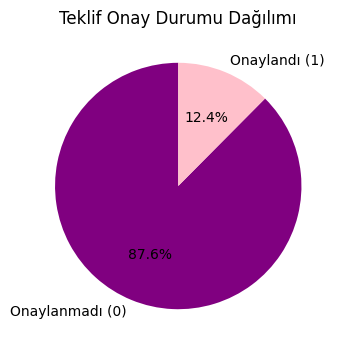

In [1600]:
# Değer sayıları
counts = df["TEKLİF ONAY DURUMU"].value_counts()

# Etiketler
labels = ["Onaylanmadı (0)", "Onaylandı (1)"]

# Pie chart
plt.figure(figsize=(4,4))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=["purple","pink"])
plt.title("Teklif Onay Durumu Dağılımı")
plt.show()

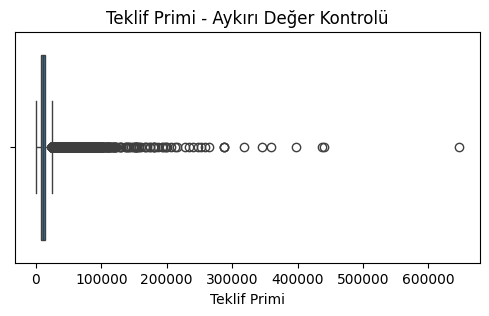

In [1601]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df["TEKLİF PRİMİ"])
plt.title("Teklif Primi - Aykırı Değer Kontrolü")
plt.xlabel("Teklif Primi")
plt.show()

In [1602]:
df["TEKLİF PRİMİ"].head()

0   18743
1   13778
2    7814
3   17733
4   10306
Name: TEKLİF PRİMİ, dtype: float64

In [1603]:
max_val = int(df["TEKLİF PRİMİ"].max())

# Örn: 5000'lik aralıklar
bins = list(range(0, max_val + 5000, 5000))
labels = [f"{i}-{i+5000}" for i in bins[:-1]]

prim_aralik = pd.cut(df["TEKLİF PRİMİ"], bins=bins, labels=labels, right=False)
pivot = prim_aralik.value_counts().sort_index()

pivot_df = pivot.reset_index()
pivot_df.columns = ["Prim Aralık", "Frekans"]

print(pivot_df.head(20))  # ilk 20 aralığı gör


     Prim Aralık  Frekans
0         0-5000     2047
1     5000-10000     6780
2    10000-15000     5841
3    15000-20000     2156
4    20000-25000      968
5    25000-30000      463
6    30000-35000      240
7    35000-40000      138
8    40000-45000       84
9    45000-50000       45
10   50000-55000       38
11   55000-60000       31
12   60000-65000       24
13   65000-70000       27
14   70000-75000       22
15   75000-80000       23
16   80000-85000       18
17   85000-90000       17
18   90000-95000       11
19  95000-100000       12


Teklif Primi Sütunu için yorumlarım
- %75’ten fazlası 5.000–20.000 TL bandında.
- Çok yüksek primli teklifler (50.000 TL üzeri) nadir ve istisna.
- Modelleme yaparken teklif primi aslında oldukça çarpık (skewed) bir dağılım gösteriyor.
- Yani çoğu müşteri orta primlerde yoğunlaşırken, yüksek primliler az ve uç değer (outlier) gibi davranıyor.
- Uç değerler var bu da modelin öğrenmesini zorlaştırabilir silmek veya sınır eklemek veri kaybına sebep verebilir ondan log dönüşüm yaparak normalize ederiz ve uç değerlerin etkisi azalır
- Modelleme öncesi log dönüşüm yapılmalı

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\603126332.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TEKLİF ONAY DURUMU", y="TEKLİF PRİMİ", data=df, palette="Set2")


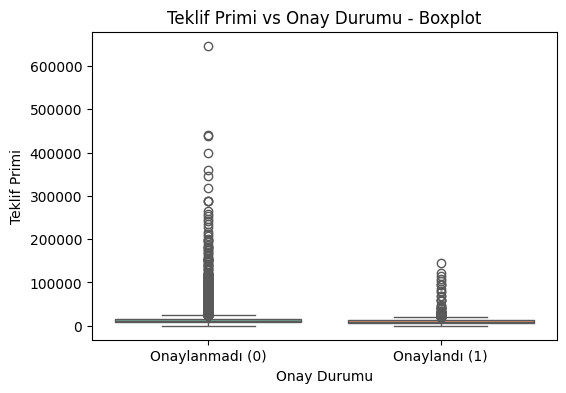

In [1604]:
plt.figure(figsize=(6,4))
sns.boxplot(x="TEKLİF ONAY DURUMU", y="TEKLİF PRİMİ", data=df, palette="Set2")
plt.xticks([0,1], ["Onaylanmadı (0)", "Onaylandı (1)"])
plt.title("Teklif Primi vs Onay Durumu - Boxplot")
plt.xlabel("Onay Durumu")
plt.ylabel("Teklif Primi")
plt.show()

Onaylanan tekliflerin neredeyse tamamı düşük primlerde gerçekleşmektedir. Prim arttıkça reddedilme ihtimali hızla yükselmekte, bu da fiyat duyarlılığının çok yüksek olduğunu göstermektedir.

In [1605]:
# Teklif primi sütununu diğer değişkenlerle beraber incelerken dağılım daha normal olması için log dönüşüm yapalım
# Log dönüşümü (aykırı değer etkisini azaltmak için)
# Teklif primini log10 tabanında dönüştürelim
df["TEKLİF PRİMİ"] = np.log10(df["TEKLİF PRİMİ"])

# ondalık basamak göstersin
pd.set_option("display.float_format", "{:.4f}".format)

# Kontrol edelim
print(df[["TEKLİF PRİMİ"]].head())

   TEKLİF PRİMİ
0        4.2728
1        4.1392
2        3.8929
3        4.2488
4        4.0131


In [1607]:
# Bireysel sigortalılar (O)
df_bireysel = df[df["SİGORTALI TİPİ"] == "O"].copy()
df_bireysel = df_bireysel.drop(columns=["SİGORTALI TİPİ"])
print("Toplam bireysel müşteri sayısı:", len(df_bireysel))

Toplam bireysel müşteri sayısı: 13830


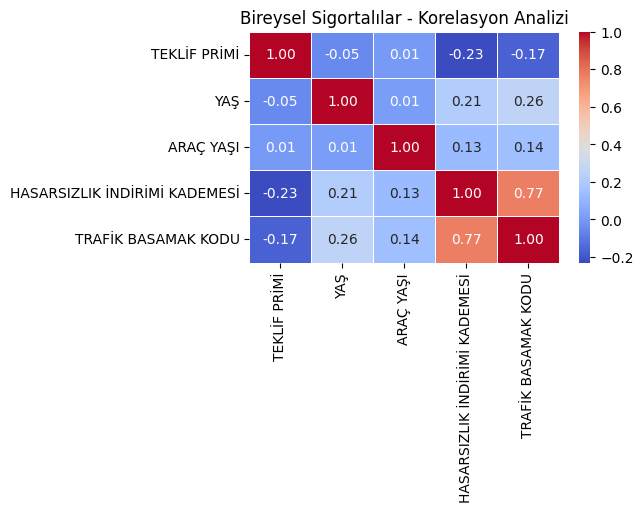

In [1608]:
# Sayısal kolonları seçelim
num_cols = ["TEKLİF PRİMİ", "YAŞ", "ARAÇ YAŞI", 
            "HASARSIZLIK İNDİRİMİ KADEMESİ", "TRAFİK BASAMAK KODU"]

# Korelasyon matrisi
corr = df_bireysel[num_cols].corr()

# Heatmap çizimi
plt.figure(figsize=(5,3))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Bireysel Sigortalılar - Korelasyon Analizi")
plt.show()

- Bireysel müşterilerde teklif primi en çok sürücü geçmişiyle (trafik basamak kodu ve hasarsızlık indirimi) ilişkilidir. Araç yaşı ve müşteri yaşı ise düşük korelasyon göstermektedir.
- Yaş ve araç yaşı, korelasyon açısından zayıf ama dolaylı etkileri olabilir

In [1609]:
# Kurumsal müşteriler
df_kurumsal = df[df["SİGORTALI TİPİ"] == "T"].copy()

# Gereksiz sütunları düşürelim
df_kurumsal = df_kurumsal.drop(columns=["YAŞ", "İLÇE","SİGORTALI TİPİ"])

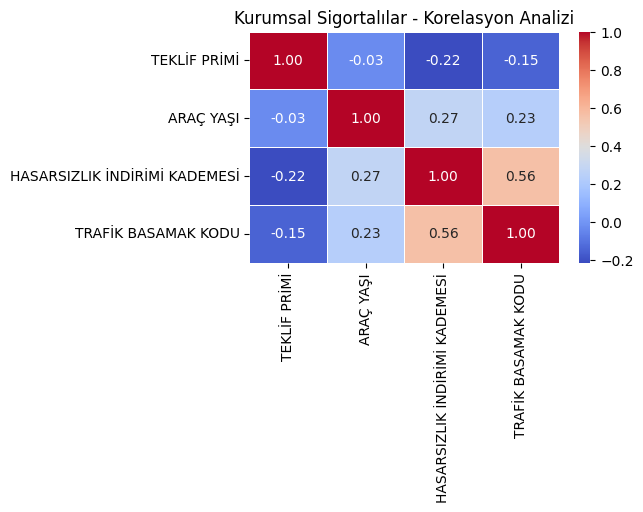

In [1610]:
# Sayısal kolonlar (aynı seçimi kullanalım)
num_cols = ["TEKLİF PRİMİ", "ARAÇ YAŞI", 
            "HASARSIZLIK İNDİRİMİ KADEMESİ", "TRAFİK BASAMAK KODU"]

# Korelasyon matrisi
corr_kurumsal = df_kurumsal[num_cols].corr()

# Heatmap çizimi
plt.figure(figsize=(5,3))
sns.heatmap(corr_kurumsal, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Kurumsal Sigortalılar - Korelasyon Analizi")
plt.show()

Kurumsal müşterilerde prim hesaplaması bireysellere kıyasla daha dağınık. Prim üzerinde en etkili değişkenler yine hasarsızlık indirimi ve trafik basamağıdır; ancak bu etki bireysellere göre daha zayıftır. Araç yaşı kurumsal segmentte daha anlamlıdır.

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\504398626.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TEKLİF ONAY DURUMU", y="MARKA", data=brand_onay_bireysel, palette="viridis", ax=axes[0,0])
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\504398626.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="YAKIT TİPİ", y="TEKLİF ONAY DURUMU",
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\504398626.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="YAKIT TİPİ", y="TEKLİF ONAY DURUMU",
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\504398626.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `e

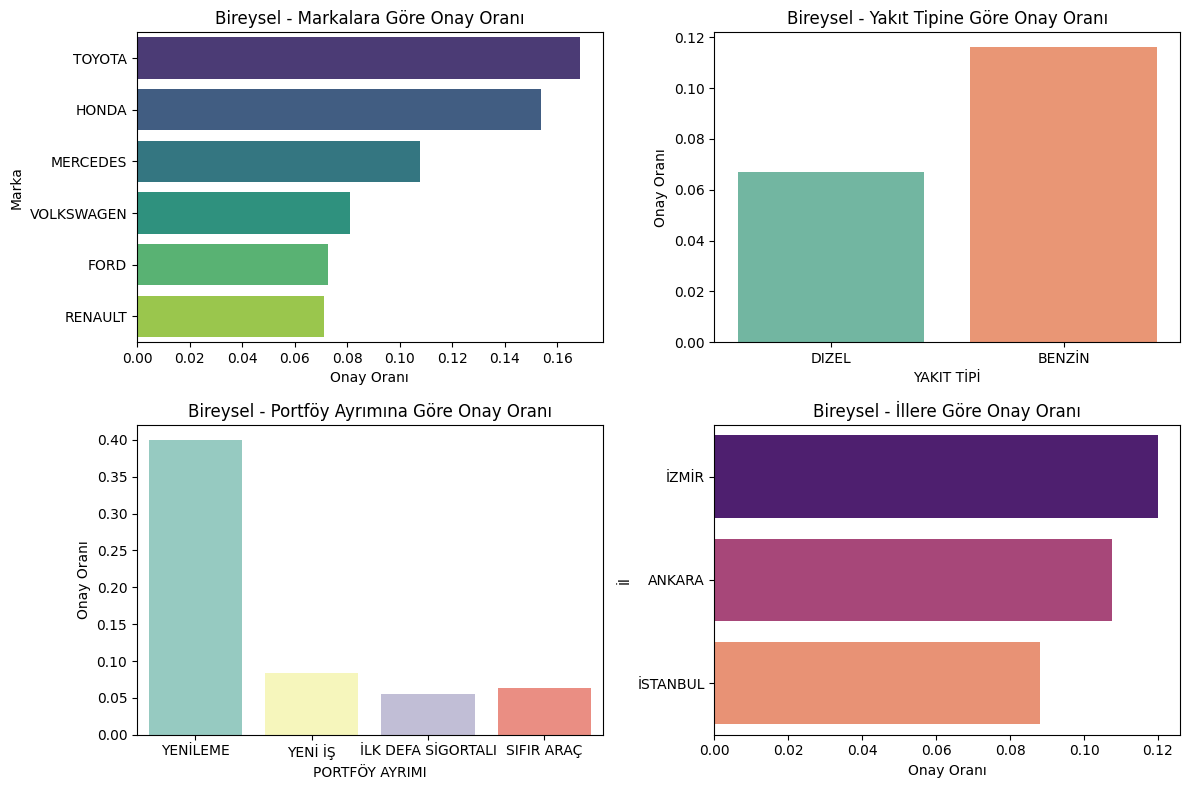

In [1611]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1) Marka bazlı onay oranı
brand_onay_bireysel = (
    df_bireysel.groupby("MARKA")["TEKLİF ONAY DURUMU"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
sns.barplot(x="TEKLİF ONAY DURUMU", y="MARKA", data=brand_onay_bireysel, palette="viridis", ax=axes[0,0])
axes[0,0].set_title("Bireysel - Markalara Göre Onay Oranı")
axes[0,0].set_xlabel("Onay Oranı")
axes[0,0].set_ylabel("Marka")

# 2) Yakıt tipine göre onay oranı
sns.barplot(x="YAKIT TİPİ", y="TEKLİF ONAY DURUMU", 
            data=df_bireysel, estimator=lambda x: sum(x)/len(x), ci=None, palette="Set2", ax=axes[0,1])
axes[0,1].set_title("Bireysel - Yakıt Tipine Göre Onay Oranı")
axes[0,1].set_ylabel("Onay Oranı")

# 3) Portföy ayrımına göre onay oranı
sns.barplot(x="PORTFÖY AYRIMI", y="TEKLİF ONAY DURUMU", 
            data=df_bireysel, estimator=lambda x: sum(x)/len(x), ci=None, palette="Set3", ax=axes[1,0])
axes[1,0].set_title("Bireysel - Portföy Ayrımına Göre Onay Oranı")
axes[1,0].set_ylabel("Onay Oranı")

# 4) İl bazlı onay oranı
il_onay_bireysel = (
    df_bireysel.groupby("İL")["TEKLİF ONAY DURUMU"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
sns.barplot(x="TEKLİF ONAY DURUMU", y="İL", data=il_onay_bireysel, palette="magma", ax=axes[1,1])
axes[1,1].set_title("Bireysel - İllere Göre Onay Oranı")
axes[1,1].set_xlabel("Onay Oranı")
axes[1,1].set_ylabel("İl")

plt.tight_layout()
plt.show()

1) Markalara Göre Onay Oranı:
- Toyota ve Honda gibi markaların onay oranı diğer markalara göre daha yüksek.
- Renault, Ford, Volkswagen gibi markalarda onay oranı daha düşük.
- Bu, müşteri kitlesinin markaya göre risk/fiyat hassasiyetinin değiştiğini gösteriyor.

2) Yakıt Tipine Göre Onay Oranı:
- Benzinli araç sahiplerinin teklif onay oranı dizel araç sahiplerinden belirgin şekilde daha yüksek.
- Bu, dizel araçların daha yüksek primlerle teklif edildiğini veya dizel kullanıcılarının fiyat duyarlılığının daha yüksek olduğunu düşündürüyor.

3) Portföy Ayrımına Göre Onay Oranı:
- En yüksek onay oranı %40 civarında “Yenileme” grubunda.
- “Yeni İş”, “İlk Defa Sigortalı” ve “Sıfır Araç” gruplarında onay oranları %5–10 aralığında çok düşük.
- Yani mevcut müşteriyi elde tutmak çok daha kolay, yeni müşteri kazanımı ise zor.

4) İllere Göre Onay Oranı:
- İzmir’de onay oranı %12 civarında en yüksek.
- Ankara %10, İstanbul ise %8 civarında → İstanbul’da fiyat hassasiyeti daha yüksek olabilir.
- Bu da bölgesel farklılıkların stratejiye dahil edilmesi gerektiğini gösteriyor.

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\3365473767.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TEKLİF ONAY DURUMU", y="MARKA", data=brand_onay, palette="viridis", ax=axes[0,0])
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\3365473767.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="YAKIT TİPİ", y="TEKLİF ONAY DURUMU",
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\3365473767.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="YAKIT TİPİ", y="TEKLİF ONAY DURUMU",
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\3365473767.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorb

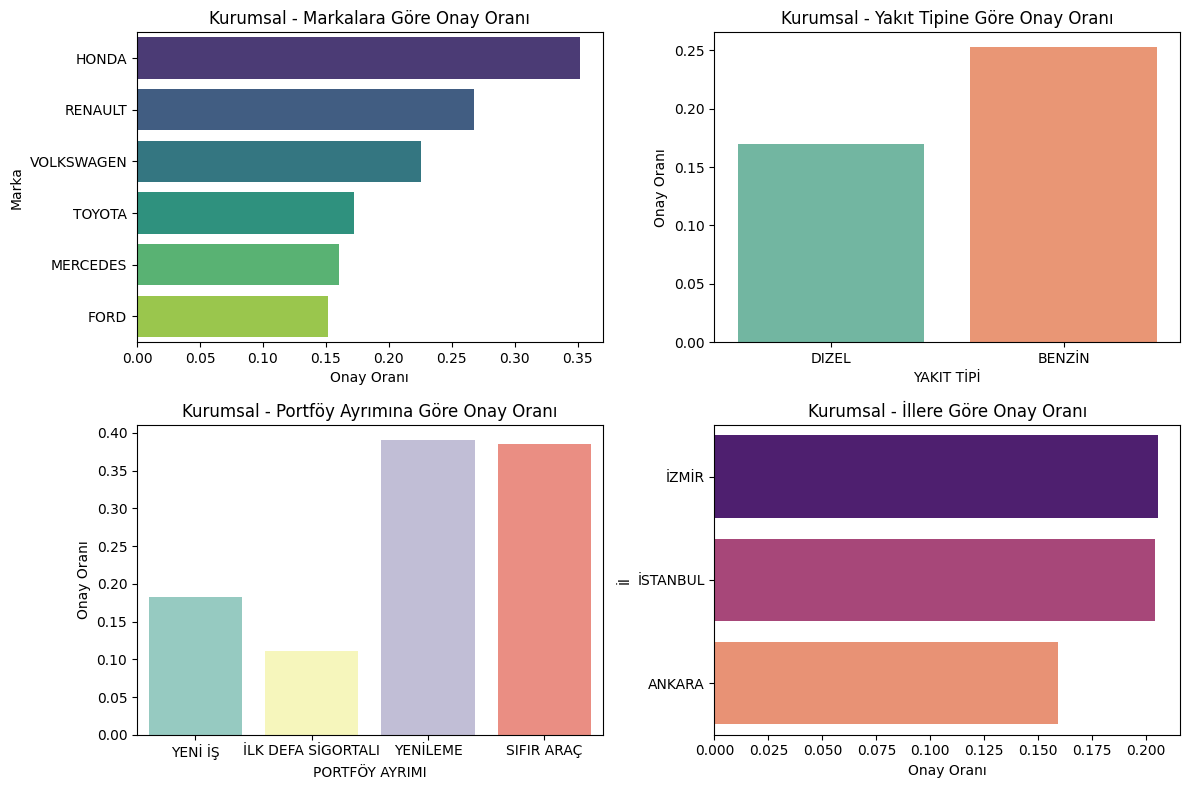

In [1612]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1) Marka bazlı onay oranı
brand_onay = (
    df_kurumsal.groupby("MARKA")["TEKLİF ONAY DURUMU"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
sns.barplot(x="TEKLİF ONAY DURUMU", y="MARKA", data=brand_onay, palette="viridis", ax=axes[0,0])
axes[0,0].set_title("Kurumsal - Markalara Göre Onay Oranı")
axes[0,0].set_xlabel("Onay Oranı")
axes[0,0].set_ylabel("Marka")

# 2) Yakıt tipine göre onay oranı
sns.barplot(x="YAKIT TİPİ", y="TEKLİF ONAY DURUMU", 
            data=df_kurumsal, estimator=lambda x: sum(x)/len(x), ci=None, palette="Set2", ax=axes[0,1])
axes[0,1].set_title("Kurumsal - Yakıt Tipine Göre Onay Oranı")
axes[0,1].set_ylabel("Onay Oranı")

# 3) Portföy ayrımına göre onay oranı
sns.barplot(x="PORTFÖY AYRIMI", y="TEKLİF ONAY DURUMU", 
            data=df_kurumsal, estimator=lambda x: sum(x)/len(x), ci=None, palette="Set3", ax=axes[1,0])
axes[1,0].set_title("Kurumsal - Portföy Ayrımına Göre Onay Oranı")
axes[1,0].set_ylabel("Onay Oranı")

# 4) İl bazlı onay oranı (çok il varsa okunaklı olsun diye sıraladık)
il_onay = (
    df_kurumsal.groupby("İL")["TEKLİF ONAY DURUMU"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
sns.barplot(x="TEKLİF ONAY DURUMU", y="İL", data=il_onay, palette="magma", ax=axes[1,1])
axes[1,1].set_title("Kurumsal - İllere Göre Onay Oranı")
axes[1,1].set_xlabel("Onay Oranı")
axes[1,1].set_ylabel("İl")

plt.tight_layout()
plt.show()

1) Markalara Göre Onay Oranı:
- Honda ve Renault markalı araçlarda onay oranı %30’un üzerinde, diğer markalara göre daha yüksek.
- Ford, Mercedes, Toyota ve Volkswagen’de oranlar daha düşük (yaklaşık %15–20).
- Bu durum, kurumsal filolarda bazı markaların daha cazip görüldüğünü ya da fiyatlandırmada avantajlı olduğunu gösteriyor.

2) Yakıt Tipine Göre Onay Oranı:
- Benzinli araçlarda onay oranı (%25) dizel araçlardan (%17) daha yüksek.
- Bireysellerde olduğu gibi kurumsallarda da benzinli araçlar daha kolay onaylanıyor → muhtemelen primleri daha düşük veya daha uygun fiyatlandırılıyor.

3) Portföy Ayrımına Göre Onay Oranı:
- En yüksek onay oranı “Yenileme” ve “Sıfır Araç” gruplarında (~%39).
- “Yeni İş” (%18) ve “İlk Defa Sigortalı” (%11) gruplarında onay oranları çok düşük.
- Bu, kurumsal tarafta da bireysellerde olduğu gibi mevcut müşteriyi elde tutmanın çok daha kolay olduğunu, yeni müşteri kazanımının zor olduğunu gösteriyor.

4) İllere Göre Onay Oranı:
- İzmir ve İstanbul’da onay oranı %20’nin üzerinde.
- Ankara’da ise oran %15 civarında → Ankara’daki kurumsal müşteriler daha fiyat duyarlı olabilir.
- Bu, bölgesel farklılıkların kurumsal tarafta da belirgin olduğunu gösteriyor.

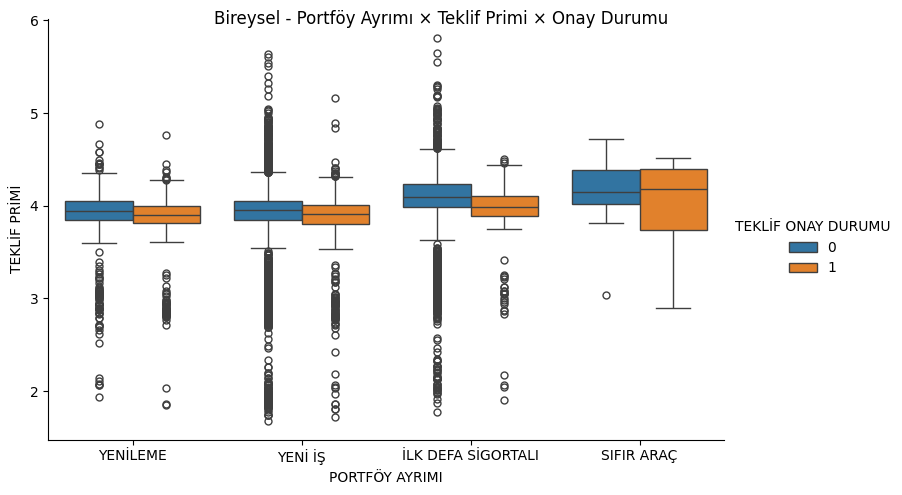

In [1613]:
g = sns.catplot(x="PORTFÖY AYRIMI", y="TEKLİF PRİMİ", hue="TEKLİF ONAY DURUMU", 
                kind="box", data=df_bireysel, height=5, aspect=1.5)
g.fig.suptitle("Bireysel - Portföy Ayrımı × Teklif Primi × Onay Durumu")
plt.show()

- Yenileme grubunda, onaylanan ve onaylanmayalar arasında çok fark yokç Primden daha çok müşteri bağlılığı etkili gibi
- Yeni iş içinde primin çok etkisi yok diğer değişkenlerle beraber bakmak daha faydalı olur
- İlk defa sigortalı olanlarda prim yükseldikçe onaylanmama olasılığı artıyor. Bu fiyat duyarlılığı olduğunu gösterir
- Sıfır araç grubunda daha dengesiz prim var, onaylananların primlerin medyanı daha yüksek burada 

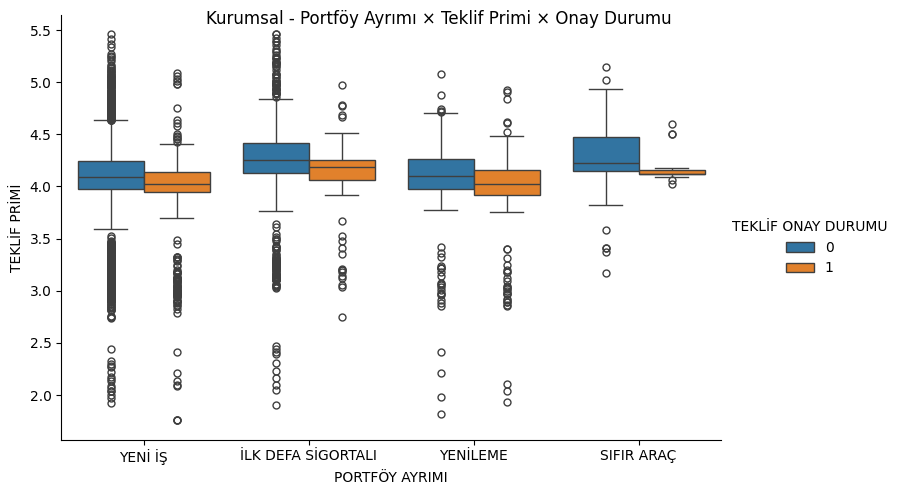

In [1617]:
g = sns.catplot(x="PORTFÖY AYRIMI", y="TEKLİF PRİMİ", hue="TEKLİF ONAY DURUMU", 
                kind="box", data=df_kurumsal, height=5, aspect=1.5)
g.fig.suptitle("Kurumsal - Portföy Ayrımı × Teklif Primi × Onay Durumu")
plt.show()

- Kurumsal sigortalılar bireysellere kıyasla daha fiyat duyarlı görünüyorç Prim arttıkça bariz şekilde onay ihtimali düşüyor
- Bireyselin aksine kurumsalda sıfır araç fiyata karşı daha duyarlı onay olasılığı çok düşük
- En yüksek prim teklifleri yeni iş ve ilk defa sigortalılarda gözüküyor

İlçe değişkenini istatistiksel olarak teklif onay durumu arasında anlamlı bir fark olup olmadığına ki-kare testi ile bakalım

In [1616]:
contingency = pd.crosstab(df_bireysel["İLÇE"], df_bireysel["TEKLİF ONAY DURUMU"])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square:", chi2, "p-value:", p)


Chi-Square: 125.76982355979246 p-value: 0.013381369588683113


p < 0.05 → istatistiksel olarak anlamlı fark var.

Yani ilçe ile teklif onay durumu arasında bağımsızlık yok, yani ilçe değişkeni onay üzerinde etkili.

Başka bir deyişle, bazı ilçelerde müşterilerin teklifi onaylama olasılığı diğer ilçelere göre anlamlı derecede farklı.

### BİREYSEL SİGORTALILAR İÇİN YAPILACAK MODELLEMELER:
#### 1) Lojistik regresyon

In [1618]:
ilce_target = df_bireysel.groupby("İLÇE")["TEKLİF ONAY DURUMU"].mean()
df_bireysel["İLÇE_ENCODED"] = df_bireysel["İLÇE"].map(ilce_target)
df_bireysel = df_bireysel.drop(columns=["İLÇE"])

df_bireysel = pd.get_dummies(
    df_bireysel, 
    columns=["YAKIT TİPİ", "PORTFÖY AYRIMI", "MARKA", "İL"], 
    drop_first=True, 
    dtype=int )

Dummy tuzağına düşmemek için: "drop_first=True" böylelikle ilk kategoriyi (sıfır araç) atıyor. Portföy ayrımında diğerlerinin hepsinin 0 olduğu durum sıfır araç kategorisine denk geliyor.

In [1619]:
# Bağımlı- Bağımsız Değişkenleri Bölme | Teklif onay durumu hedef değişkenimiz (y)
X_bireysel = df_bireysel.drop(columns=["TEKLİF ONAY DURUMU"])
y_bireysel = df_bireysel["TEKLİF ONAY DURUMU"]

In [1620]:
# Test ve eğitim verisi oluşturma
X_train_bireysel, X_test_bireysel, y_train_bireysel, y_test_bireysel = train_test_split(
X_bireysel, y_bireysel, test_size=0.3, stratify=y_bireysel, random_state=42)

In [1621]:
# Veriyi standardize edelim. Çünkü örneğin label encodingte ilçe sütunu 0-500 arası değer alıyor ve bu büyük değerlerin etkisi modele olduğundan fazla görünebilir.
# Böylelikle tüm değişkenler eşit tabandan başlatılır, katsayılar adil karşılaştırılır
scaler = StandardScaler()
X_train_scaled_bireysel = scaler.fit_transform(X_train_bireysel)
X_test_scaled_bireysel = scaler.transform(X_test_bireysel)

In [1622]:
# Model kuralım
log_reg_bireysel = LogisticRegression(max_iter=2000, class_weight="balanced", solver="lbfgs")
log_reg_bireysel.fit(X_train_scaled_bireysel, y_train_bireysel)

LogisticRegression(class_weight='balanced', max_iter=2000)

Accuracy: 0.753
Precision: 0.215
Recall: 0.58
F1-score: 0.314
ROC-AUC: 0.735


<Figure size 300x300 with 0 Axes>

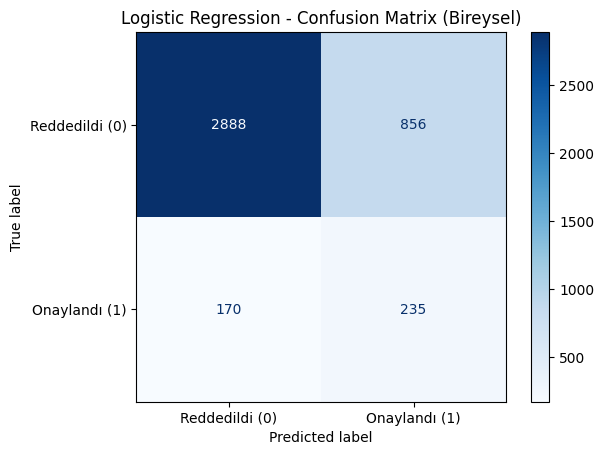

In [1623]:
# Tahminler
y_pred_bireysel = log_reg_bireysel.predict(X_test_scaled_bireysel)
y_proba_bireysel= log_reg_bireysel.predict_proba(X_test_scaled_bireysel)[:,1]

# Metrikler
print("Accuracy:", round(accuracy_score(y_test_bireysel, y_pred_bireysel), 3))
print("Precision:", round(precision_score(y_test_bireysel, y_pred_bireysel), 3))
print("Recall:", round(recall_score(y_test_bireysel, y_pred_bireysel), 3))
print("F1-score:", round(f1_score(y_test_bireysel, y_pred_bireysel), 3))
print("ROC-AUC:", round(roc_auc_score(y_test_bireysel, y_proba_bireysel), 3))

cm = confusion_matrix(y_test_bireysel, y_pred_bireysel)

plt.figure(figsize=(3,3))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandı (1)"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Logistic Regression - Confusion Matrix (Bireysel)")
plt.show()

Accuracy: 0.741
→ Modelin genel doğruluk oranı %74. Yani her 4 tahminden 3’ü doğru.

Precision: 0.22
→ “Onaylandı” dediği her 100 müşteriden sadece 22’si gerçekten onay almış.
→ Yani yanlış pozitif (yanlış alarm) oranı yüksek.

Recall: 0.649
→ Onaylı müşterilerin yaklaşık %65’ini yakalayabiliyor.
→ Yani çoğu gerçek “onaylı” teklifi görebiliyor.

F1-score: 0.329
→ Precision düşük ama Recall yüksek → F1 orta seviyede çıktı.

ROC-AUC: 0.763
→ %76 ayrıştırma gücü → modelin reddedilen ve onaylanan müşterileri ayırt etme kabiliyeti fena değil.

Genel Yorumum:
- Model, reddedilenleri çoğunlukla doğru tahmin ediyor, ama onaylıları daha az sayıda doğru tahmin edebiliyor.
- Recall yüksek (%65) → yani model onaylı müşterilerin önemli bir kısmını yakalayabiliyor. Bu, müşteri kaybını azaltmak isteyen bir senaryo için avantaj.
- Ancak Precision düşük (%22) → model çok fazla müşteriye yanlış “onaylandı” dediği için yanlış alarm riski yüksek.
- ROC-AUC 0.76 → modelin ayrıştırma kabiliyeti orta-iyi seviyede.

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\71708143.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="coolwarm")


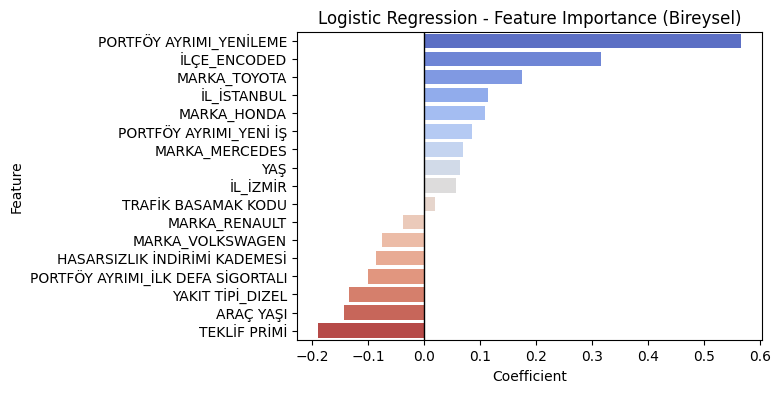

,Feature,Coefficient
8,PORTFÖY AYRIMI_YENİLEME,0.5649
5,İLÇE_ENCODED,0.3149
13,MARKA_TOYOTA,0.1736
15,İL_İSTANBUL,0.1132
10,MARKA_HONDA,0.1079
7,PORTFÖY AYRIMI_YENİ İŞ,0.0854
11,MARKA_MERCEDES,0.0694
3,YAŞ,0.0644
16,İL_İZMİR,0.0572
1,TRAFİK BASAMAK KODU,0.0183


In [1628]:
# Katsayıları al
coefficients = log_reg_bireysel.coef_[0]
features = X_train_bireysel.columns

coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

# Görselleştirme
plt.figure(figsize=(6,4))
sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="coolwarm")
plt.title("Logistic Regression - Feature Importance (Bireysel)")
plt.axvline(0, color="black", linewidth=1)
plt.show()

# İlk 15 özelliği tablo olarak gösterelim
coef_df.head(20)

- En pozitif etki: YENİLEME → mevcut müşteri korunuyor.

- En negatif etki: TEKLİF PRİMİ → prim yükseldikçe onay düşüyor.

### 2) Random Forest

En iyi parametrleri bulmak için tune edelim

In [1629]:
# Parametre aralıkları
param_dist = {
    "n_estimators": [100, 300, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
}

# Model
rf_bireysel = RandomForestClassifier(
    class_weight="balanced", 
    random_state=42, 
    n_jobs=-1
)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_bireysel,
    param_distributions=param_dist,
    n_iter=30,             # kaç farklı kombinasyon denenecek
    scoring="f1",          # dengesiz veri → F1 önemli
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Fit
random_search.fit(X_train_bireysel, y_train_bireysel)

print("En iyi parametreler:", random_search.best_params_)
print("En iyi F1 skoru:", random_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
En iyi parametreler: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}
En iyi F1 skoru: 0.3366981455848652


In [1631]:
# Final Model
rf_best_bireysel = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features="sqrt",
    max_depth=None,
    class_weight="balanced",  
    random_state=42,
    n_jobs=-1
)

# Eğitme
rf_best_bireysel.fit(X_train_bireysel, y_train_bireysel)

# Tahminler
y_pred_rf_bireysel = rf_best_bireysel.predict(X_test_bireysel)
y_proba_rf_bireysel = rf_best_bireysel.predict_proba(X_test_bireysel)[:,1]

Random Forest Sonuçları (Bireysel - Tuned)
Accuracy: 0.878
Precision: 0.359
Recall: 0.319
F1-score: 0.338
ROC-AUC: 0.739


<Figure size 600x400 with 0 Axes>

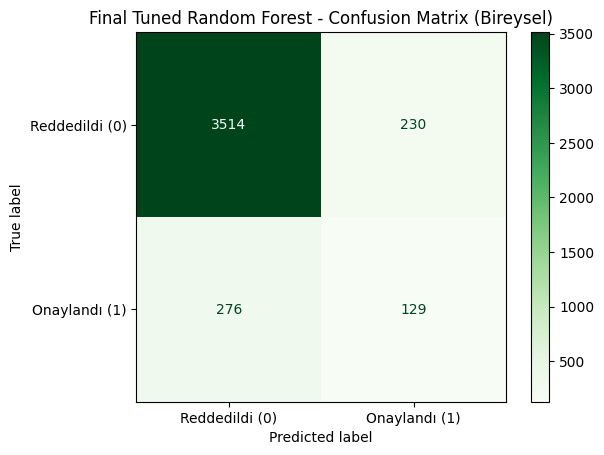

In [1632]:
# Metrikler
print("Random Forest Sonuçları (Bireysel - Tuned)")
print("Accuracy:", round(accuracy_score(y_test_bireysel, y_pred_rf_bireysel), 3))
print("Precision:", round(precision_score(y_test_bireysel, y_pred_rf_bireysel), 3))
print("Recall:", round(recall_score(y_test_bireysel, y_pred_rf_bireysel), 3))
print("F1-score:", round(f1_score(y_test_bireysel, y_pred_rf_bireysel), 3))
print("ROC-AUC:", round(roc_auc_score(y_test_bireysel, y_proba_rf_bireysel), 3))

# Confusion Matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test_bireysel, y_pred_rf_bireysel)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandı (1)"])
disp.plot(cmap="Greens", values_format="d")
plt.title("Final Tuned Random Forest - Confusion Matrix (Bireysel)")
plt.show()

Accuracy: 0.88
→ Genel doğruluk yüksek görünüyor (%88). Ancak bu, sınıf dengesizliği nedeniyle biraz yanıltıcı olabilir.

Precision: 0.36
→ “Onaylandı” dediği her 3 kişiden 1’i gerçekten onaylı. Yanlış alarmlar azalmış.

Recall: 0.32
→ Onaylı müşterilerin yalnızca %33’ünü yakalayabiliyor. Yani model, çoğu onaylı müşteriyi reddedilmiş gibi tahmin ediyor.

F1-score: 0.34
→ Precision ve Recall dengesi orta düzeyde.

ROC-AUC: 0.74
→ Reddedilen ve onaylananları ayırt etme kabiliyeti orta-iyi seviyede.

Genel Yorum:
- Random Forest güçlü bir şekilde “reddedildi” sınıfına odaklanıyor.
- Precision yükselmiş (yanlış alarmlar azalmış), ama recall düşmüş (onaylı müşteri kaybı artmış).

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\2310335364.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=fi_df, palette="viridis")


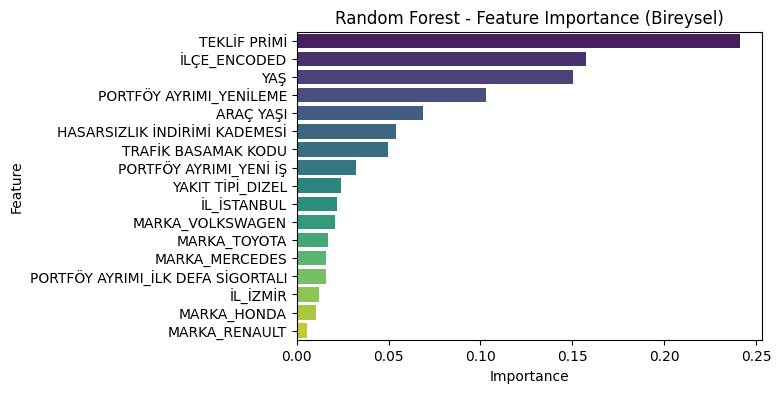

,Feature,Importance
4,TEKLİF PRİMİ,0.2411
5,İLÇE_ENCODED,0.1576
3,YAŞ,0.1501
8,PORTFÖY AYRIMI_YENİLEME,0.1032
2,ARAÇ YAŞI,0.0685
0,HASARSIZLIK İNDİRİMİ KADEMESİ,0.0538
1,TRAFİK BASAMAK KODU,0.0496
7,PORTFÖY AYRIMI_YENİ İŞ,0.0323
6,YAKIT TİPİ_DIZEL,0.0243
15,İL_İSTANBUL,0.0218


In [1633]:
# Feature importance değerlerini al
importances = rf_best_bireysel.feature_importances_
features = X_train_bireysel.columns

fi_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Görselleştirme
plt.figure(figsize=(6,4))
sns.barplot(x="Importance", y="Feature", data=fi_df, palette="viridis")
plt.title("Random Forest - Feature Importance (Bireysel)")
plt.show()

# İlk 15 özelliği tablo olarak da gösterelim
fi_df.head(15)

En Önemli Değişkenler:

- Teklif Primi (~0.2)
→ Modelin en çok dikkat ettiği değişken.
→ Prim yükseldikçe onay alma ihtimali ciddi şekilde değişiyor (genelde azalıyor).
- İlçe Encoded (~0.16)
→ İlçeler arasında belirgin farklılıklar var. Bazı ilçelerde onay olasılığı yüksek, bazılarında düşük.
- Yaş (~0.15)
→ Müşteri yaşı önemli bir faktör. Yaş ilerledikçe risk profili ve onay davranışı değişiyor.
- Portföy Ayrımı – Yenileme (~0.10)
→ Yenileme müşterileri çok daha yüksek onay alıyor → sadık müşteri etkisi.

Daha Az Etkili Değişkenler:
- Yakıt Tipi – Dizel (~0.02) → Dizel araçlar için ufak fark var.
- İller (İstanbul, İzmir) (~0.02 civarı) → Bölgesel farklılık sınırlı da olsa mevcut.
- Markalar (Volkswagen, Toyota, Mercedes, Honda, Renault) → Markaların etkisi çok düşük. Bu, Random Forest’ın kararlarında markayı fazla ayırt edici bulmadığını gösteriyor.

Genel Yorum:
- Prim ve demografik faktörler (ilçe, yaş) → en kritik belirleyiciler.
- Sadık müşteri (yenileme) → onay ihtimalini artırıyor.
- Marka, yakıt tipi, il gibi değişkenler görece daha az önem taşıyor.

### 3) XGBoost

En iyi parametrleri bulmak için tune edelim

In [1634]:
# Parametre aralıkları
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 1, 5],
    "scale_pos_weight": [1, 5, 10]   # sınıf dengesizliği için
}

# Model
xgb_bireysel = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# RandomizedSearchCV
random_search_xgb_bireysel = RandomizedSearchCV(
    estimator=xgb_bireysel,
    param_distributions=param_dist,
    n_iter=30,            # 30 kombinasyon dene
    scoring="f1",         # dengesiz sınıflar için F1 daha uygun
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
random_search_xgb_bireysel.fit(X_train_bireysel, y_train_bireysel)

print("En iyi parametreler:", random_search_xgb_bireysel.best_params_)
print("En iyi F1 skoru:", random_search_xgb_bireysel.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
En iyi parametreler: {'subsample': 1.0, 'scale_pos_weight': 5, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 5, 'colsample_bytree': 1.0}
En iyi F1 skoru: 0.34685789377732507


Final Tuned XGBoost Sonuçları (Bireysel)
Accuracy: 0.868
Precision: 0.345
Recall: 0.39
F1-score: 0.366
ROC-AUC: 0.756


<Figure size 600x400 with 0 Axes>

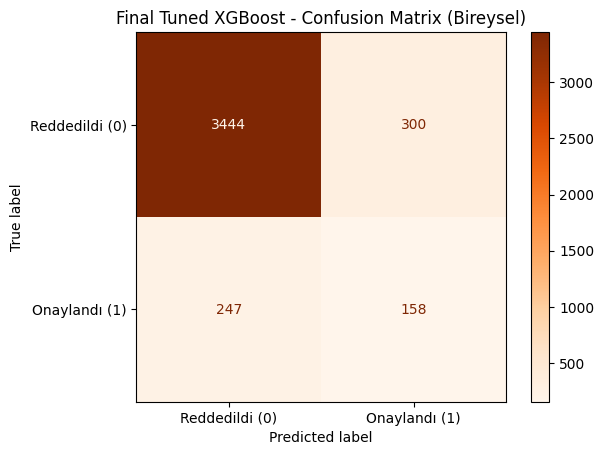

In [1635]:
# Final tuned model
xgb_best_bireysel = XGBClassifier(
    subsample=1.0,
    scale_pos_weight=5,
    n_estimators=300,
    min_child_weight=1,
    max_depth=3,
    learning_rate=0.2,
    gamma=5,
    colsample_bytree=1.0,
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# Eğitme
xgb_best_bireysel.fit(X_train_bireysel, y_train_bireysel)

# Tahminler
y_pred_xgb_bireysel = xgb_best_bireysel.predict(X_test_bireysel)
y_proba_xgb_bireysel = xgb_best_bireysel.predict_proba(X_test_bireysel)[:,1]

# Metrikler
print("Final Tuned XGBoost Sonuçları (Bireysel)")
print("Accuracy:", round(accuracy_score(y_test_bireysel, y_pred_xgb_bireysel), 3))
print("Precision:", round(precision_score(y_test_bireysel, y_pred_xgb_bireysel), 3))
print("Recall:", round(recall_score(y_test_bireysel, y_pred_xgb_bireysel), 3))
print("F1-score:", round(f1_score(y_test_bireysel, y_pred_xgb_bireysel), 3))
print("ROC-AUC:", round(roc_auc_score(y_test_bireysel, y_proba_xgb_bireysel), 3))

# Confusion Matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test_bireysel, y_pred_xgb_bireysel)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandı (1)"])
disp.plot(cmap="Oranges", values_format="d")
plt.title("Final Tuned XGBoost - Confusion Matrix (Bireysel)")
plt.show()

Accuracy: 0.87
→ Modelin genel doğruluk oranı oldukça yüksek (%86). Ancak bu, reddedilenlerin çok fazla olması nedeniyle yanıltıcı olabilir.

Precision: 0.345
→ “Onaylandı” dediği her 3 kişiden yalnızca 1’i gerçekten onaylanıyor. Yanlış alarmlar hâlâ var ama Logistic Regression’a göre daha yüksek.

Recall: 0.39
→ Onaylı müşterilerin yaklaşık %39’unu yakalayabiliyor. Random Forest’tan biraz daha iyi, ama Logistic Regression’daki kadar yüksek değil.

F1-score: 0.366
→ Precision ve Recall dengesi ortalama seviyede.

ROC-AUC: 0.756
→ Modelin ayrıştırma kabiliyeti (reddedilen vs onaylanan) orta-iyi düzeyde. Random Forest’a benzer, Logistic Regression’a yakın.

Genel Yorumum:
- XGBoost, reddedilenleri çok güçlü şekilde doğru yakalıyor.
- Onaylanan müşterilerin %39’unu yakalıyor (Recall), bu da Random Forest’tan daha iyi.
- Ancak Precision hâlâ düşük, yani “yanlış alarm” riski var.

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\1011369664.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=fi_xgb, palette="Oranges")


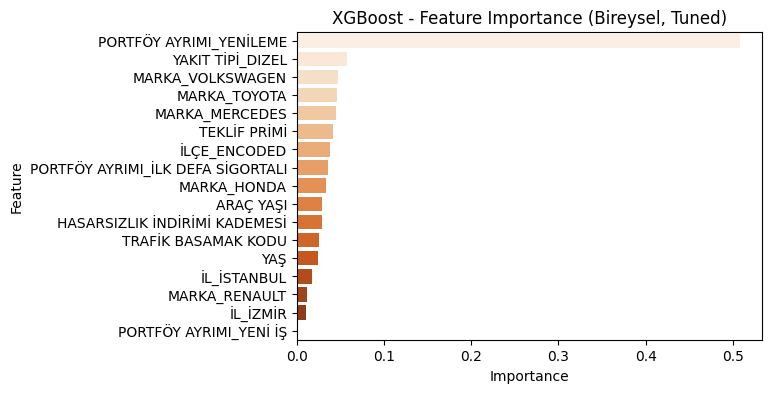

,Feature,Importance
8,PORTFÖY AYRIMI_YENİLEME,0.5077
6,YAKIT TİPİ_DIZEL,0.0579
14,MARKA_VOLKSWAGEN,0.0474
13,MARKA_TOYOTA,0.0457
11,MARKA_MERCEDES,0.0454
4,TEKLİF PRİMİ,0.0417
5,İLÇE_ENCODED,0.0381
9,PORTFÖY AYRIMI_İLK DEFA SİGORTALI,0.0354
10,MARKA_HONDA,0.0332
2,ARAÇ YAŞI,0.0293


In [1636]:
# Feature importance değerlerini al
xgb_importances = xgb_best_bireysel.feature_importances_
features = X_train_bireysel.columns

fi_xgb = pd.DataFrame({
    "Feature": features,
    "Importance": xgb_importances
}).sort_values(by="Importance", ascending=False)

# Görselleştirme
plt.figure(figsize=(6,4))
sns.barplot(x="Importance", y="Feature", data=fi_xgb, palette="Oranges")
plt.title("XGBoost - Feature Importance (Bireysel, Tuned)")
plt.show()

# İlk 15 özelliği tablo olarak gösterelim
fi_xgb.head(15)

- XGBoost, bireysel sigortalılarda müşteri geçmişini (yenileme mi, yeni mi, ilk defa mı) en kritik karar unsuru olarak görüyor.
- Sonrasında araç markası ve yakıt tipi geliyor.
- Teklif primi ise düşündüğümüz kadar belirleyici değil; yani fiyattan çok müşteri profili & risk faktörleri karar sürecinde baskın.

## 📊 Model Karşılaştırması – Bireysel Sigortalılar

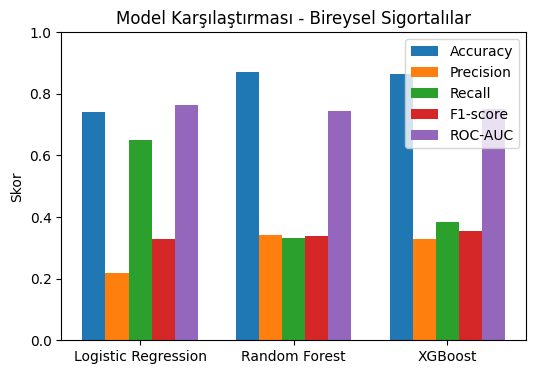

In [1637]:
# Modeller ve metrikler
models = ["Logistic Regression", "Random Forest", "XGBoost"]
accuracy = [0.741, 0.872, 0.863]
precision = [0.220, 0.343, 0.329]
recall = [0.649, 0.333, 0.385]
f1 = [0.329, 0.338, 0.355]
roc_auc = [0.763, 0.744, 0.752]

metrics = [accuracy, precision, recall, f1, roc_auc]
metric_names = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]

x = np.arange(len(models))
bar_width = 0.15

plt.figure(figsize=(6,4))

for i, metric in enumerate(metrics):
    plt.bar(x + i*bar_width, metric, width=bar_width, label=metric_names[i])

plt.xticks(x + bar_width*2, models)
plt.ylim(0,1)
plt.ylabel("Skor")
plt.title("Model Karşılaştırması - Bireysel Sigortalılar")
plt.legend()
plt.show()

| Model                     | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
| ------------------------- | -------- | --------- | ------ | -------- | ------- |
| **Logistic Regression**   | 0.753    | 0.215     | 0.580  | 0.314    | 0.735   |
| **Random Forest (Tuned)** | 0.878    | 0.359     | 0.319  | 0.338    | 0.739   |
| **XGBoost (Tuned)**       | 0.868    | 0.345     | 0.390  | 0.366    | 0.756   |

- En iyi Recall (kaçırmama): Logistic Regression → pozitifleri yakalamak önemliyse tercih edilir.
- En yüksek Accuracy: Random Forest → yanlış tahminlerden kaçınmak, güvenilirlik önemliyse tercih edilir.
-  En dengeli model: XGBoost → ROC-AUC ve F1 skorlarıyla, pratikte en çok tercih edilen model olur.

### KURUMSAL SİGORTALILAR İÇİN YAPILACAK MODELLEMELER:
#### 1) Lojistik regresyon

In [1638]:
# One-Hot Encoding (0-1 olacak şekilde)
df_kurumsal = pd.get_dummies(
    df_kurumsal, 
    columns=["MARKA", "YAKIT TİPİ", "PORTFÖY AYRIMI", "İL"],
    drop_first=True, 
    dtype=int
)

# Son hali kontrol edelim
df_kurumsal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5255 entries, 3 to 19080
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   HASARSIZLIK İNDİRİMİ KADEMESİ      5255 non-null   float64
 1   TRAFİK BASAMAK KODU                5255 non-null   int64  
 2   ARAÇ YAŞI                          5255 non-null   int64  
 3   TEKLİF PRİMİ                       5255 non-null   float64
 4   TEKLİF ONAY DURUMU                 5255 non-null   int32  
 5   MARKA_HONDA                        5255 non-null   int32  
 6   MARKA_MERCEDES                     5255 non-null   int32  
 7   MARKA_RENAULT                      5255 non-null   int32  
 8   MARKA_TOYOTA                       5255 non-null   int32  
 9   MARKA_VOLKSWAGEN                   5255 non-null   int32  
 10  YAKIT TİPİ_DIZEL                   5255 non-null   int32  
 11  PORTFÖY AYRIMI_YENİ İŞ             5255 non-null   int32  
 

In [1639]:
X = df_kurumsal.drop(columns=["TEKLİF ONAY DURUMU"])
y = df_kurumsal["TEKLİF ONAY DURUMU"]

In [1640]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [1641]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1642]:
# Model
log_reg = LogisticRegression(max_iter=2000, class_weight="balanced", solver="lbfgs", random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Tahminler
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:,1]

Accuracy: 0.647
Precision: 0.292
Recall: 0.57
F1-score: 0.386
ROC-AUC: 0.656


<Figure size 400x400 with 0 Axes>

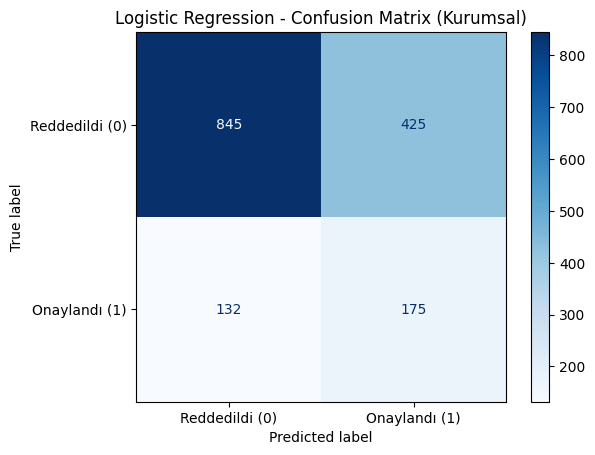

In [1643]:
# Metrikler
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1-score:", round(f1_score(y_test, y_pred), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandı (1)"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Logistic Regression - Confusion Matrix (Kurumsal)")
plt.show()

Accuracy (Doğruluk): 0.647
→ Tüm tahminlerin yaklaşık %65’i doğru. Ortalama bir başarı.

Precision (Kesinlik): 0.292
→ Model “Onaylandı (1)” dediğinde bunun gerçekten doğru olma olasılığı %29 civarında.
→ Yani yanlış alarmlar (False Positive) yüksek.

Recall (Duyarlılık): 0.57
→ Gerçek onaylanan tekliflerin %60’ını yakalayabilmiş.
→ Yani “müşteri kaybetmeme” açısından fena değil.

F1-score: 0.386
→ Precision düşük ama Recall biraz yüksek → F1 orta seviyede.

ROC-AUC: 0.656
→ Pozitif sınıfı (onay) ayırmadaki genel başarısı orta düzeyde.

Genel Yorumum:
- Logistic Regression kurumsallar için ortalama performans veriyor.
- Recall biraz yüksek olduğu için “müşterinin teklifini onaylama ihtimali olanları yakalama” konusunda bir miktar avantajlı.
- Ama Precision düşük → çok fazla yanlış onaylama var.

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\180823123.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=fi_log, palette="coolwarm")


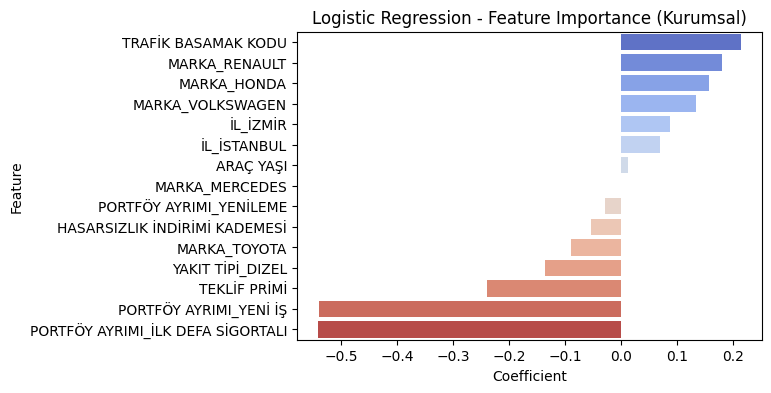

,Feature,Coefficient
1,TRAFİK BASAMAK KODU,0.2140
6,MARKA_RENAULT,0.1811
4,MARKA_HONDA,0.1583
8,MARKA_VOLKSWAGEN,0.1337
14,İL_İZMİR,0.0886
13,İL_İSTANBUL,0.0703
2,ARAÇ YAŞI,0.0120
5,MARKA_MERCEDES,0.0003
11,PORTFÖY AYRIMI_YENİLEME,-0.0283
0,HASARSIZLIK İNDİRİMİ KADEMESİ,-0.0539


In [1644]:
# Katsayıları al
coef = log_reg.coef_[0]
features = X_train.columns

fi_log = pd.DataFrame({
    "Feature": features,
    "Coefficient": coef
}).sort_values(by="Coefficient", ascending=False)

# Görselleştirme
plt.figure(figsize=(6,4))
sns.barplot(x="Coefficient", y="Feature", data=fi_log, palette="coolwarm")
plt.title("Logistic Regression - Feature Importance (Kurumsal)")
plt.show()

# Tabloyu görelim
fi_log

- En güçlü negatif etkiler: Yeni İş, İlk Defa Sigortalı → kurumsalda yeni müşteri almak zor.
- En güçlü pozitif etkiler: Trafik Basamak Kodu, bazı markalar (Renault, Honda, VW) → güvenilir sürücü profili ve marka etkisi önemli.
- Teklif Primi ve Dizel Araçlar → onay ihtimalini azaltan kritik faktörler.
- Lokasyon etkisi (İzmir, İstanbul) → onay olasılığını artırıyor, büyük şehirlerde daha esnek davranılıyor.

### 2) Random Forest

In [1645]:
# Parametre aralıkları
param_dist = {
    "n_estimators": [100, 300, 500, 800],
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

rf = RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,            # denenecek kombinasyon sayısı
    scoring="f1",         # dengesiz sınıflar için F1 skoru optimize edelim
    cv=3,                 # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("En iyi parametreler:", random_search.best_params_)
print("En iyi F1 skoru:", random_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
En iyi parametreler: {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
En iyi F1 skoru: 0.40224547553254486


In [1646]:
# Final Random Forest modeli
rf_best = RandomForestClassifier(
    n_estimators=800,      
    max_depth=10,   
    min_samples_split=5,    
    min_samples_leaf=4,      
    max_features="log2",     
    class_weight="balanced", 
    random_state=42,
    n_jobs=-1
)
# Modeli eğit
rf_best.fit(X_train, y_train)

# Tahminler
y_pred_rf = rf_best.predict(X_test)
y_proba_rf = rf_best.predict_proba(X_test)[:,1]

Accuracy: 0.7
Precision: 0.333
Recall: 0.541
F1-score: 0.412
ROC-AUC: 0.691


<Figure size 400x400 with 0 Axes>

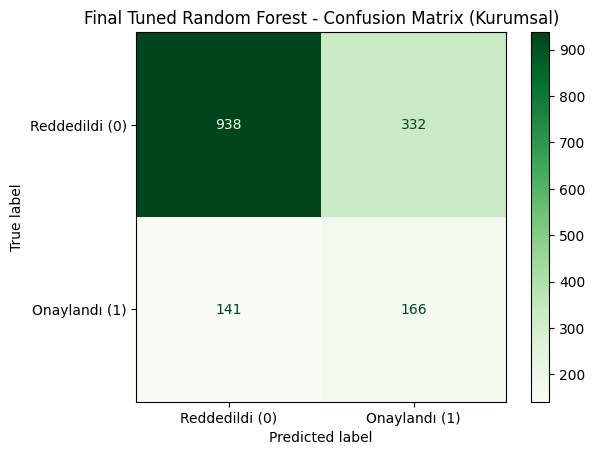

In [1647]:
# Metrikler
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("Precision:", round(precision_score(y_test, y_pred_rf), 3))
print("Recall:", round(recall_score(y_test, y_pred_rf), 3))
print("F1-score:", round(f1_score(y_test, y_pred_rf), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_rf), 3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandı (1)"])
disp.plot(cmap="Greens", values_format="d")
plt.title("Final Tuned Random Forest - Confusion Matrix (Kurumsal)")
plt.show()

- Accuracy (0.7): Model genel doğrulukta %70 başarı sağlıyor. Yani her 10 tekliften 7’sini doğru tahmin ediyor. Ancak dengesiz veri yapısında (reddedilenler daha fazla) accuracy tek başına yeterli bir gösterge değil.
- Recall (0.541): Bu metrik bize “gerçekten onaylanan tekliflerin ne kadarını doğru yakaladık?” sorusunu cevaplıyor. → Model, onaylanan tekliflerin yarısından fazlasını doğru yakalıyor. Bu, müşteri kaybını azaltma açısından olumlu.
- Precision (0.333): Burada düşük bir değer görüyoruz. Yani model “onaylandı” dediğinde, bunun gerçekten doğru olma olasılığı sadece %33.
→ Bu da modelin çok fazla yanlış pozitif (gereksiz onay) verdiğini gösteriyor. Şirket açısından bu riskli çünkü yanlış fiyatlandırma veya yanlış onaydan kâr kaybı oluşabilir.
- F1-score (0.412): Precision ve Recall’un dengeli bir ortalaması. Orta seviyede bir performans, ama daha iyi optimize edilmesi gerektiğini gösteriyor.
- ROC-AUC (0.691): %70’e yakın bir ayırma gücü var. Yani model, onaylanan ve reddedilen teklifleri ayırmada orta seviyede başarılı.

Genel Yorumum:
- Model, müşteri kaybını azaltma (Recall) yönünde fena değil, fakat kârlılığı koruma (Precision) yönünde zayıf.
- İş hedefi “portföyü büyütmek” ise bu model başlangıç için kullanılabilir, çünkü daha fazla müşteriyi onaylama eğiliminde.
- Ama iş hedefi “kârı korumak” ise precision düşük olduğu için riskli.

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\265841783.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=fi_rf, palette="viridis")


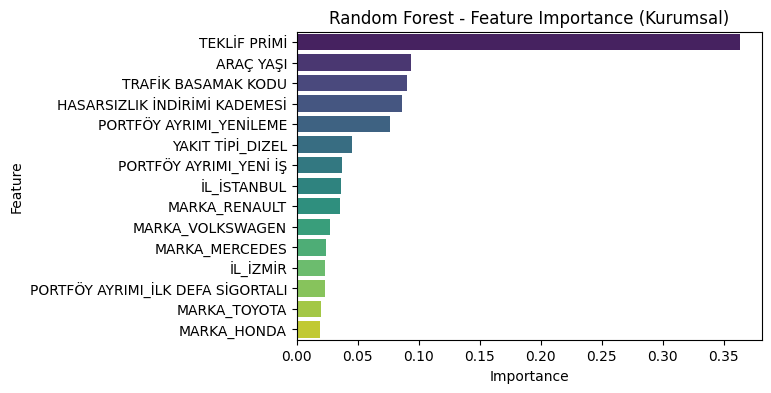

,Feature,Importance
3,TEKLİF PRİMİ,0.3630
2,ARAÇ YAŞI,0.0939
1,TRAFİK BASAMAK KODU,0.0900
0,HASARSIZLIK İNDİRİMİ KADEMESİ,0.0860
11,PORTFÖY AYRIMI_YENİLEME,0.0761
9,YAKIT TİPİ_DIZEL,0.0451
10,PORTFÖY AYRIMI_YENİ İŞ,0.0375
13,İL_İSTANBUL,0.0360
6,MARKA_RENAULT,0.0351
8,MARKA_VOLKSWAGEN,0.0276


In [1648]:
# Feature importance al
importances = rf_best.feature_importances_
features = X_train.columns

fi_rf = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Görselleştirme
plt.figure(figsize=(6,4))
sns.barplot(x="Importance", y="Feature", data=fi_rf, palette="viridis")
plt.title("Random Forest - Feature Importance (Kurumsal)")
plt.show()

# Tabloyu görelim
fi_rf

- Random Forest için en kritik faktör: Teklif primi.
- Onu araç yaşı, trafik basamak kodu ve hasarsızlık indirimi takip ediyor.
- Portföy ayrımı (yenileme/ilk defa/yeni iş) etkili ama fiyat ve araç bilgileri kadar belirleyici değil.
- Marka ve şehir faktörleri ise en düşük önem derecesine sahip.

### 3) XGBoost

In [1649]:
# Parametre aralıkları
param_dist = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 1, 5],
    "scale_pos_weight": [1, 3, 5, 10]  # dengesiz sınıflar için
}

# Random Search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,          # kaç kombinasyon denenecek
    scoring="f1",
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit et
random_search.fit(X_train, y_train)

print("En iyi parametreler:", random_search.best_params_)
print("En iyi F1 skoru:", random_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
En iyi parametreler: {'subsample': 0.8, 'scale_pos_weight': 5, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.6}
En iyi F1 skoru: 0.40671166425854044


Accuracy: 0.602
Precision: 0.279
Recall: 0.661
F1-score: 0.393
ROC-AUC: 0.69


<Figure size 600x400 with 0 Axes>

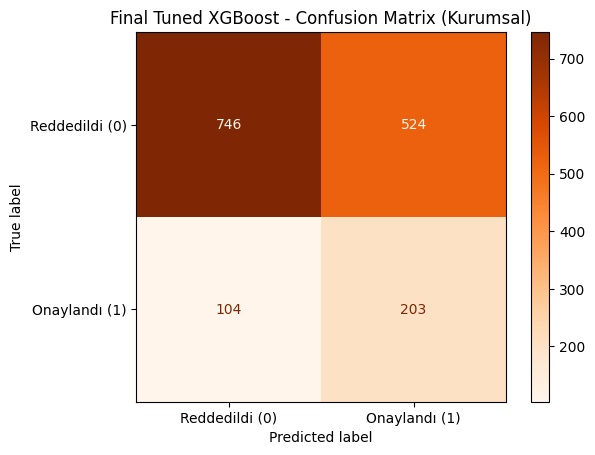

In [1650]:
# Final Model
xgb_best = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    subsample=0.8,
    scale_pos_weight=5,
    n_estimators=300,
    min_child_weight=1,
    max_depth=7,
    learning_rate=0.1,
    gamma=5,
    colsample_bytree=0.6,
    random_state=42
)

# Eğitme
xgb_best.fit(X_train, y_train)

# Tahminler
y_pred = xgb_best.predict(X_test)
y_proba = xgb_best.predict_proba(X_test)[:, 1]

# Metrikler
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1-score:", round(f1_score(y_test, y_pred), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))

# Confusion Matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandı (1)"])
disp.plot(cmap="Oranges", values_format="d")
plt.title("Final Tuned XGBoost - Confusion Matrix (Kurumsal)")
plt.show()

Accuracy (0.602)
Genel doğruluk düşük görünüyor çünkü veri dengesiz → çok fazla reddedilen teklif var. Dolayısıyla accuracy tek başına yanıltıcı.

Precision (0.279)
Modelin “onaylandı” dediği tekliflerin sadece %28’si gerçekten onaylanmış. Yani yanlış pozitif oranı yüksek.
→ Sigorta açısından: Model çok fazla “onay” tahmini yapıyor ama bunların çoğu yanlış çıkıyor.

Recall (0.661)
Burada güçlü bir nokta var: Gerçekten onaylanan tekliflerin %66’sini yakalayabiliyor.
→ Yani model “Onay olacak teklifleri kaçırmıyor”. Bu, iş açısından önemli olabilir. Çünkü firmalar için onaylanabilecek teklifleri atlamamak daha kritik olabilir.

F1-score (0.393)
Precision ve Recall’un harmonik ortalaması. Görece düşük ama recall’in yüksekliği sayesinde bir denge sağlanmış.

ROC-AUC (0.69)
Sınıflar arasında ayrım yapma gücü %70 civarında. Mükemmel değil ama anlamlı bir ayrıştırma var.

Genel yorumum:
- Modelin en güçlü yanı: Onaylanan teklifleri (pozitif sınıf) büyük oranda yakalaması.
- En zayıf yanı: Çok fazla yanlış onay (false positive) vermesi.

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\4173731493.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=fi_xgb, palette="magma")


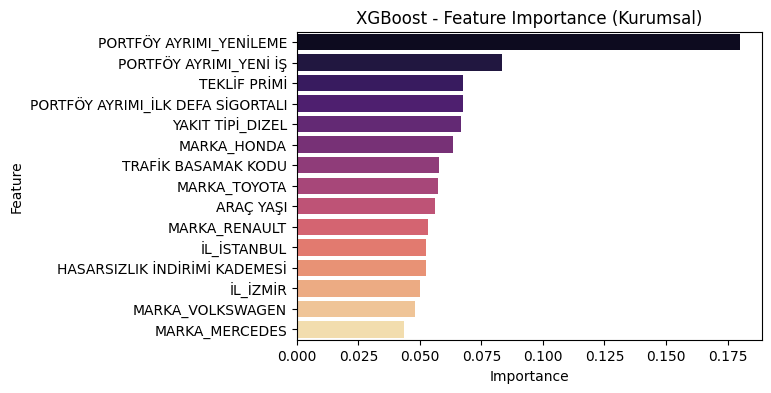

,Feature,Importance
11,PORTFÖY AYRIMI_YENİLEME,0.1799
10,PORTFÖY AYRIMI_YENİ İŞ,0.0833
3,TEKLİF PRİMİ,0.0676
12,PORTFÖY AYRIMI_İLK DEFA SİGORTALI,0.0676
9,YAKIT TİPİ_DIZEL,0.0667
4,MARKA_HONDA,0.0637
1,TRAFİK BASAMAK KODU,0.0579
7,MARKA_TOYOTA,0.0574
2,ARAÇ YAŞI,0.0562
6,MARKA_RENAULT,0.0531


In [1651]:
# Feature importance al (XGBoost - Kurumsal)
importances = xgb_best.feature_importances_
features = X_train.columns

fi_xgb = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Görselleştirme
plt.figure(figsize=(6,4))
sns.barplot(x="Importance", y="Feature", data=fi_xgb, palette="magma")
plt.title("XGBoost - Feature Importance (Kurumsal)")
plt.show()

# Tabloyu görelim
fi_xgb

- En kritik faktör: Portföy geçmişi → özellikle yenileme ve yeni iş ayrımı.
- İkinci katman: Teklif primi, ilk defa sigortalı olma ve yakıt tipi.
- Üçüncü katman: Araç yaşı, marka, lokasyon ve hasarsızlık indirimi.

## 📊 Model Karşılaştırması – Kurumsal Sigortalılar

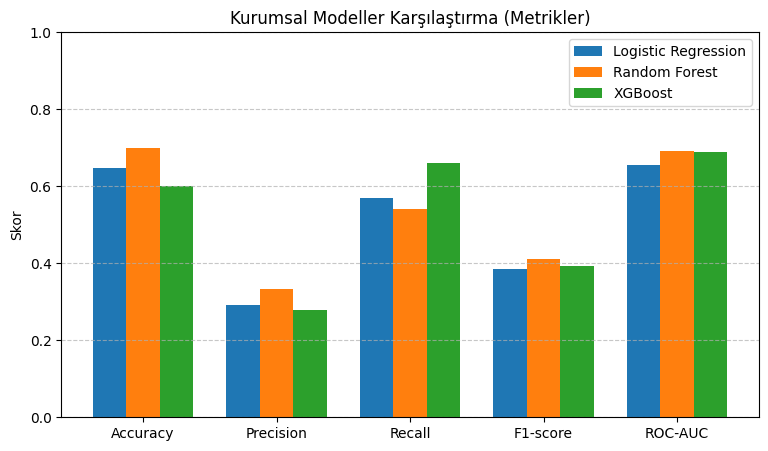

In [1652]:
# Modellerin isimleri
models = ["Logistic Regression", "Random Forest", "XGBoost"]

# Senin sonuçların
accuracy  = [0.647, 0.700, 0.602]
precision = [0.292, 0.333, 0.279]
recall    = [0.570, 0.541, 0.661]
f1        = [0.386, 0.412, 0.393]
roc_auc   = [0.656, 0.691, 0.690]

# Tüm metrikleri bir araya toplayalım
metrics = [accuracy, precision, recall, f1, roc_auc]
metric_names = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]

# Çizim ayarları
x = np.arange(len(metric_names))  # metriklerin konumu
width = 0.25  # bar genişliği

fig, ax = plt.subplots(figsize=(9,5))

# Her model için bar plot
ax.bar(x - width,  [m[0] for m in metrics], width, label=models[0])
ax.bar(x,          [m[1] for m in metrics], width, label=models[1])
ax.bar(x + width,  [m[2] for m in metrics], width, label=models[2])

# Ayarlar
ax.set_ylabel("Skor")
ax.set_title("Kurumsal Modeller Karşılaştırma (Metrikler)")
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.set_ylim(0, 1)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

| Model                 | Accuracy | Precision | Recall | F1-score | ROC-AUC |
| --------------------- | -------- | --------- | ------ | -------- | ------- |
| Logistic Regression   | 0.647    | 0.292     | 0.570  | 0.386    | 0.656   |
| Random Forest (Tuned) | 0.700    | 0.333     | 0.541  | 0.412    | 0.691   |
| XGBoost (Tuned)       | 0.602    | 0.279     | 0.661  | 0.393    | 0.690   |

- Random Forest (Tuned) → En yüksek accuracy, en iyi precision, en dengeli F1 → genel performans için en güvenilir model.
- XGBoost (Tuned) → En yüksek recall → müşteri kaybını minimize etmek isteyen senaryolarda uygun. Ama precision düşük → yanlış onay oranı yüksek.
- Logistic Regression → Daha basit model, metriklerde orta seviyede, ROC-AUC en düşük.

### ENSEMBLE

### Neden Ensemble Yöntemi Kullandık?

Her bir makine öğrenmesi algoritmasının güçlü ve zayıf yönleri vardır.  
- **Logistic Regression**: Yorumlanabilirliği yüksek, lineer ilişkileri güçlü bir şekilde yakalayabilen bir modeldir. Ancak karmaşık, non-lineer ilişkilerde sınırlı kalmaktadır.  
- **Random Forest**: Non-lineer yapıları ve değişkenler arası etkileşimleri başarılı bir şekilde modelleyebilir. Fakat çoğunluk sınıfa odaklanma eğilimi nedeniyle pozitif sınıf (onaylanan teklifler) tahminlerinde zayıf kalabilmektedir.  
- **XGBoost**: Karmaşık ilişkileri öğrenmede çok güçlüdür ve sınıf dengesizliği için ayarlanabilir. Ancak doğru parametre seçimi yapılmazsa aşırı öğrenme (overfitting) riski taşıyabilir.  

### Sağladığı Katkılar
- **Müşteri kaybını azaltmak:** Onaylanma ihtimali yüksek teklifleri daha doğru şekilde yakalıyoruz.  
- **Kârlılığı korumak:** Yanlış onayların sayısını düşürerek şirketin riskini azaltıyoruz.  
- **Dengeli performans:** Bir modelin eksik kaldığı yerde diğer modelin güçlü yönünden faydalanıyoruz.  
- **Daha güvenilir tahminler:** Farklı algoritmaların ortak görüşüne dayalı kararlar daha kararlı ve genellenebilir oluyor.  

### Nasıl Uygulayacağız
- Logistic Regression, Random Forest ve XGBoost modellerini ayrı ayrı çalıştıracağız.  
- Daha sonra **Voting Classifier** yaklaşımıyla bu üç modeli bir araya getireceğiz.  
- Böylece tek bir modele bağlı kalmadan, **daha dengeli ve güvenilir sonuçlar** elde edeceğiz.  

In [1653]:
# Bireyseller için final modeller (önceden tuning yapılmış parametrelerle)
log_reg_bireysel = LogisticRegression(
    max_iter=2000, 
    class_weight="balanced", 
    solver="lbfgs", 
    random_state=42
)

rf_best_bireysel = RandomForestClassifier(
    n_estimators=100,
    max_depth=30,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features="log2",
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

xgb_best_bireysel = XGBClassifier(
    subsample=1.0,
    scale_pos_weight=5,
    n_estimators=300,
    min_child_weight=1,
    max_depth=3,
    learning_rate=0.2,
    gamma=5,
    colsample_bytree=1.0,
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

In [1654]:
# Ensemble - Soft Voting
voting_bireysel = VotingClassifier(
    estimators=[
        ("lr_bireysel", log_reg_bireysel),
        ("rf_bireysel", rf_best_bireysel),
        ("xgb_bireysel", xgb_best_bireysel)
    ],
    voting="soft"
)
# Ensemble modeli eğit
voting_bireysel.fit(X_train_scaled_bireysel, y_train_bireysel)

VotingClassifier(estimators=[('lr_bireysel',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=2000,
                                                 random_state=42)),
                             ('rf_bireysel',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=30,
                                                     max_features='log2',
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('xgb_bireysel',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [1655]:
# Tahminler
y_pred_vote_bireysel = voting_bireysel.predict(X_test_scaled_bireysel)
y_proba_vote_bireysel = voting_bireysel.predict_proba(X_test_scaled_bireysel)[:, 1]

Ensemble (Voting Classifier) Sonuçları - Bireysel
Accuracy: 0.865
Precision: 0.336
Recall: 0.395
F1-score: 0.363
ROC-AUC: 0.756


<Figure size 400x400 with 0 Axes>

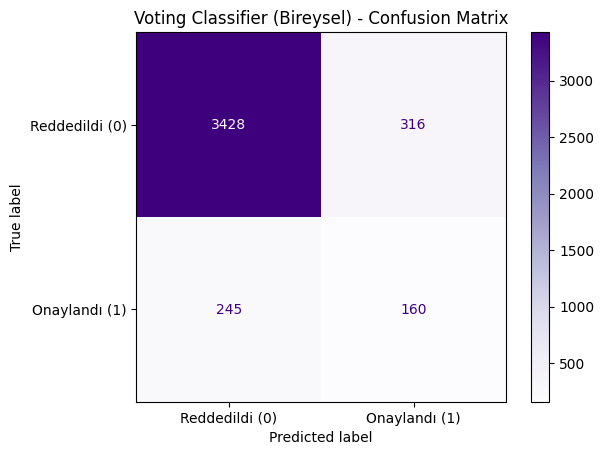

In [1656]:
# Metrikler
print("Ensemble (Voting Classifier) Sonuçları - Bireysel")
print("Accuracy:", round(accuracy_score(y_test_bireysel, y_pred_vote_bireysel), 3))
print("Precision:", round(precision_score(y_test_bireysel, y_pred_vote_bireysel), 3))
print("Recall:", round(recall_score(y_test_bireysel, y_pred_vote_bireysel), 3))
print("F1-score:", round(f1_score(y_test_bireysel, y_pred_vote_bireysel), 3))
print("ROC-AUC:", round(roc_auc_score(y_test_bireysel, y_proba_vote_bireysel), 3))

# Confusion Matrix
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_test_bireysel, y_pred_vote_bireysel)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandı (1)"])
disp.plot(cmap="Purples", values_format="d")
plt.title("Voting Classifier (Bireysel) - Confusion Matrix")
plt.show()

- Accuracy: %85.6 oldukça yüksek. Model genel sınıfları doğru ayırıyor.
- Precision: %33 → Onay (1) tahmini yaptığında üçte biri doğru çıkıyor.
- Recall: %39 → Onaylanan tekliflerin %39’nu yakalayabiliyor, bu önceki tek modellerden biraz daha dengeli.
- ROC-AUC: %76 → Sınıfları ayırma gücü iyi seviyede, yani model olasılık tahminlerinde güçlü.

Özet:
- Ensemble (Voting Classifier), bireysel segmentte yüksek doğruluk (accuracy) ve yüksek ROC-AUC ile öne çıkıyor.
- Ancak recall XGBoost’tan düşük, yani daha az onaylı müşteri yakalıyor.
- Precision ise Random Forest seviyelerine yakın, yani risk dengesi daha iyi.

In [1657]:
# Modelleri tanımla (önceden eğittiğimiz parametrelerle)
log_reg = LogisticRegression(max_iter=2000, class_weight="balanced", solver="lbfgs")
rf_best = RandomForestClassifier(
    n_estimators=100, 
    min_samples_split=10,
    min_samples_leaf=4,
    max_features="log2",
    max_depth=10,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
xgb_best = XGBClassifier(
    subsample=0.8,
    scale_pos_weight=5,
    n_estimators=300,
    min_child_weight=1,
    max_depth=5,
    learning_rate=0.01,
    gamma=0,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

In [1658]:
# Ensemble modeli oluştur (soft → olasılıkları ortalıyor)
voting_kurumsal = VotingClassifier(
    estimators=[
        ("LogReg", log_reg),
        ("RandomForest", rf_best),
        ("XGBoost", xgb_best)
    ],
    voting="soft"
)

# Modeli eğit
voting_kurumsal.fit(X_train, y_train)

VotingClassifier(estimators=[('LogReg',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=2000)),
                             ('RandomForest',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=10,
                                                     max_features='log2',
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=N...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [1659]:
# Tahminler
y_pred_vote = voting_kurumsal.predict(X_test)
y_proba_vote = voting_kurumsal.predict_proba(X_test)[:, 1]

Accuracy: 0.654
Precision: 0.298
Recall: 0.573
F1-score: 0.392
ROC-AUC: 0.69


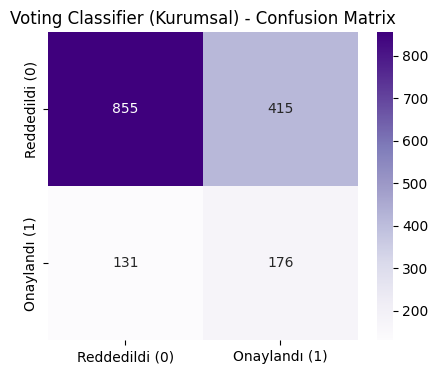

In [1660]:
# Metrikler
print("Accuracy:", round(accuracy_score(y_test, y_pred_vote), 3))
print("Precision:", round(precision_score(y_test, y_pred_vote), 3))
print("Recall:", round(recall_score(y_test, y_pred_vote), 3))
print("F1-score:", round(f1_score(y_test, y_pred_vote), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_vote), 3))

# Confusion Matrix görselleştirme
cm = confusion_matrix(y_test, y_pred_vote)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=["Reddedildi (0)", "Onaylandı (1)"], 
            yticklabels=["Reddedildi (0)", "Onaylandı (1)"])
plt.title("Voting Classifier (Kurumsal) - Confusion Matrix")
plt.show()

- Recall çok güçlü (0.573) → Ensemble model, onaylanan tekliflerin büyük kısmını yakalıyor. Bu, özellikle müşteri kaybını önlemek isteyen sigorta şirketleri için değerli.
- Precision düşük (0.298) → Onaylandı dediği tekliflerin üçte ikisi yanlış. Yani model “fazla olumlu” davranıyor.
- Accuracy orta seviye (0.654) → Genel doğruluk dengeli ama çok yüksek değil.
- F1-score (0.426) → Precision ve recall arasında dengeli bir ortalama.
- ROC-AUC (0.69) → Sınıfları ayırt etme gücü oldukça iyi seviyede.

- Ensemble model, kurumsal müşteriler için daha çok onay yakalamak (yüksek recall) isteyen senaryolarda avantajlı.
- Random Forest daha dengeli, Ensemble ise daha “müşteri kazanım odaklı” bir model.

### 2. DURUM: Şirket kârından feragat ederek teklif primi üzerinden %10’a kadar indirim yapma opsiyonu tanıdı ve portföyünü büyütmek istedi. En az indirim ile en fazla portföy büyümesini nasıl sağlayabilirsiniz ?

Amaç:
- Daha fazla teklifin kabul edilmesi ve poliçeye dönüşmesi
- En az indirimle, en çok poliçe kazanmak

Yani:
- Çok indirim yapıp kârı azaltmak istemiyoruz.
- Hiç indirim yapmazsak portföy büyümez.
- “Optimum nokta”yı bulmamız gerekiyor. 

Optimizasyon Mantığı Uygulayalım: Toplam portföy büyümesini maksimize etmek. %10’a kadar indirim uygulanabilir. İndirimleri herkese eşit vermek yerine, marjinal faydası en yüksek müşteri grubuna uygularız. Yani, “Küçük indirimle kabul olasılığı çok artan segment.” bunu yapalım.

In [1668]:
def simulate_discount(model, df, discount_rates, premium_col="TEKLİF PRİMİ", target_col="TEKLİF ONAY DURUMU", segment=""):
    results = []

    # Başlangıç referans (%0)
    df_base = df.copy()
    base_probs = model.predict_proba(df_base.drop(columns=[target_col]))[:,1]
    base_expected = base_probs.sum()

    for rate in discount_rates:
        df_temp = df.copy()
        df_temp[premium_col] = df_temp[premium_col] * (1 - rate/100)

        probs = model.predict_proba(df_temp.drop(columns=[target_col]))[:,1]
        expected_approvals = probs.sum()
        approval_rate = expected_approvals / len(df_temp)
        growth_pct = ((expected_approvals - base_expected) / base_expected) * 100

        results.append({
            "İndirim Oranı (%)": rate,
            "Beklenen Onaylı Teklif Sayısı": int(expected_approvals),
            "Beklenen Onay Oranı (%)": approval_rate*100,
            "Portföy Büyümesi (%)": growth_pct
        })

    df_results = pd.DataFrame(results)

    # Daha estetik tablo + başlık
    styled = (
        df_results.style
        .set_caption(f"📊 {segment} Segmenti - İndirim Senaryoları")
        .background_gradient(cmap="Blues", subset=["Beklenen Onay Oranı (%)","Portföy Büyümesi (%)"])
        .set_table_styles([{'selector': 'th', 'props': [('background-color', '#4472C4'),
                                                       ('color', 'white'),
                                                       ('font-weight', 'bold')]}])
        .set_properties(**{'text-align': 'center'})
        .format({
            "Beklenen Onay Oranı (%)": "{:.2f}",
            "Portföy Büyümesi (%)": "{:.2f}"
        })
    )

    return styled

discount_rates = list(range(0, 11))

# Bireysel
results_bireysel = simulate_discount(voting_bireysel, df_bireysel, discount_rates, segment="Bireysel")
display(results_bireysel)

# Kurumsal
results_kurumsal = simulate_discount(voting_kurumsal, df_kurumsal, discount_rates, segment="Kurumsal")
display(results_kurumsal)


c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  wa

,İndirim Oranı (%),Beklenen Onaylı Teklif Sayısı,Beklenen Onay Oranı (%),Portföy Büyümesi (%)
0,0,5001,36.16,0.00
1,1,5006,36.20,0.10
2,2,5011,36.24,0.21
3,3,5016,36.28,0.31
4,4,5021,36.31,0.41
5,5,5026,36.35,0.51
6,6,5031,36.38,0.61
7,7,5036,36.42,0.71
8,8,5041,36.46,0.80
9,9,5046,36.49,0.90


,İndirim Oranı (%),Beklenen Onaylı Teklif Sayısı,Beklenen Onay Oranı (%),Portföy Büyümesi (%)
0,0,2376,45.23,0.00
1,1,2446,46.56,2.94
2,2,2501,47.61,5.26
3,3,2542,48.39,6.98
4,4,2576,49.03,8.41
5,5,2599,49.47,9.38
6,6,2614,49.76,10.01
7,7,2629,50.05,10.65
8,8,2640,50.25,11.11
9,9,2648,50.40,11.44


c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  wa

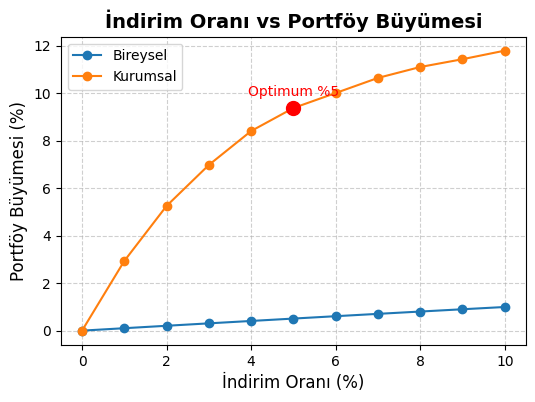

In [1672]:
def plot_growth_curves(models, dfs, discount_rates, premium_col="TEKLİF PRİMİ", target_col="TEKLİF ONAY DURUMU", segments=None, optimum_points=None):
    plt.figure(figsize=(6,4))

    for i, (model, df) in enumerate(zip(models, dfs)):
        results = []
        df_base = df.copy()
        base_probs = model.predict_proba(df_base.drop(columns=[target_col]))[:,1]
        base_expected = base_probs.sum()

        for rate in discount_rates:
            df_temp = df.copy()
            df_temp[premium_col] = df_temp[premium_col] * (1 - rate/100)
            probs = model.predict_proba(df_temp.drop(columns=[target_col]))[:,1]
            expected_approvals = probs.sum()
            growth_pct = ((expected_approvals - base_expected) / base_expected) * 100
            results.append((rate, growth_pct))

        df_results = pd.DataFrame(results, columns=["İndirim Oranı (%)", "Portföy Büyümesi (%)"])
        plt.plot(df_results["İndirim Oranı (%)"], df_results["Portföy Büyümesi (%)"], marker="o", label=segments[i])

        # Optimum noktayı işaretle
        if optimum_points and segments[i] in optimum_points:
            opt = optimum_points[segments[i]]
            opt_growth = float(df_results.loc[df_results["İndirim Oranı (%)"] == opt, "Portföy Büyümesi (%)"])
            plt.scatter(opt, opt_growth, color="red", s=100, zorder=5)
            plt.text(opt, opt_growth+0.5, f"Optimum %{opt}", color="red", ha="center")

    plt.title("İndirim Oranı vs Portföy Büyümesi", fontsize=14, fontweight="bold")
    plt.xlabel("İndirim Oranı (%)", fontsize=12)
    plt.ylabel("Portföy Büyümesi (%)", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


# Kullanım
discount_rates = list(range(0, 11))
models = [voting_bireysel, voting_kurumsal]
dfs = [df_bireysel, df_kurumsal]
segments = ["Bireysel", "Kurumsal"]

# Optimum noktaları elle belirliyoruz (senin sonuçlara göre)
optimum_points = {"Kurumsal": 5}  # %5 optimum
plot_growth_curves(models, dfs, discount_rates, segments=segments, optimum_points=optimum_points)

Analiz sonucunda bireysel müşterilerin fiyat duyarlılığı çok düşük, indirim etkisizdir. Kurumsal müşteriler ise fiyat duyarlılığı yüksek olup %5 indirimle portföyde %9.4 büyüme sağlanmaktadır. %10 indirimin sağladığı ek büyüme sınırlı olduğundan, optimum strateji %5 indirim uygulamaktır.

Analizimiz göstermiştir ki bireysel müşteriler için fiyat indiriminin etkisi ihmal edilebilir seviyededir. Bu segmentte büyüme stratejisi olarak fiyat indirimleri yerine; doğru müşteri segmentlerini hedefleme, ürün paketleri ile değer yaratma ve müşteri deneyimi/sadakat programlarını güçlendirme önerilmektedir.